# Analyzing Duplicates

This is a streamlined version of duplicates-dev.ipynb that is more paper ready.



In [3]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_abs_deviation as MAD
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


/Users/rfinn/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<Figure size 720x720 with 0 Axes>

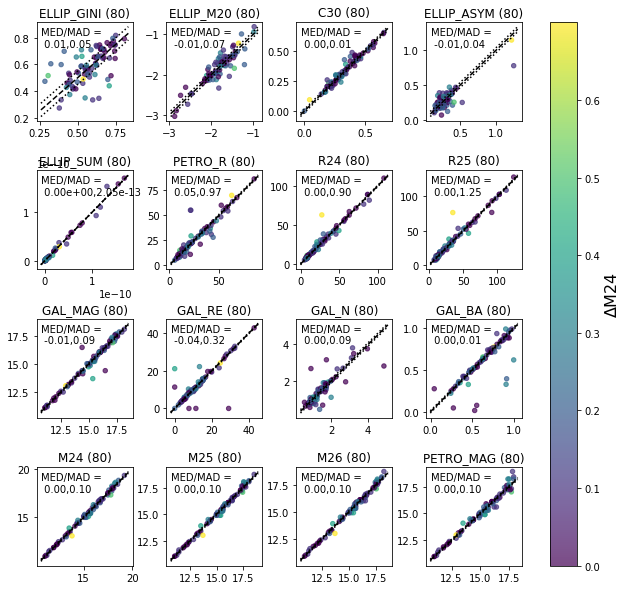

In [2]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams()
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

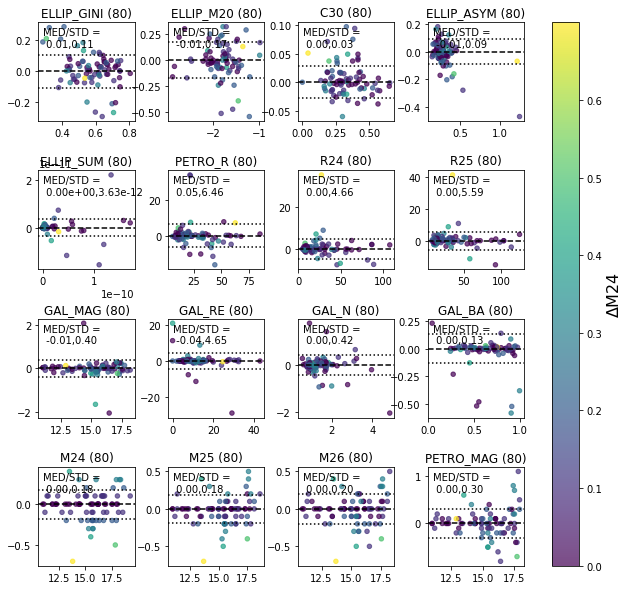

In [3]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams_residuals()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

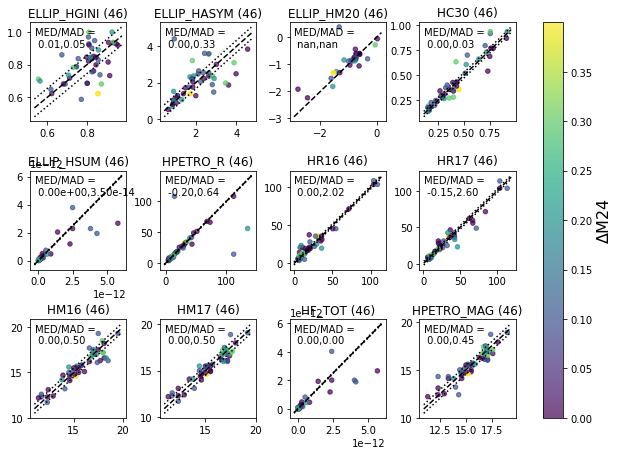

In [4]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

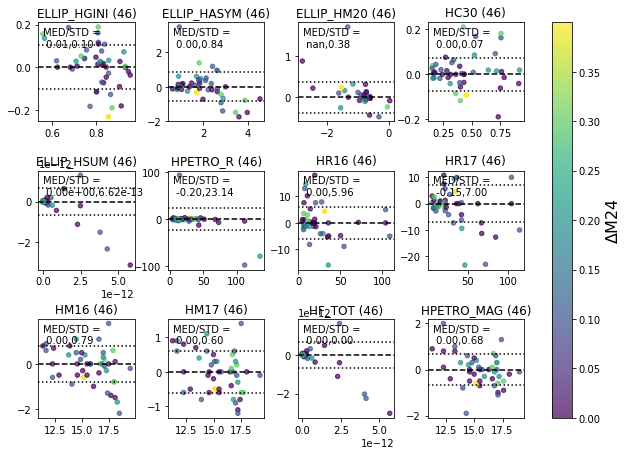

In [5]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams_residuals()

# Compare STATMORPH Params

### R-band Results

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

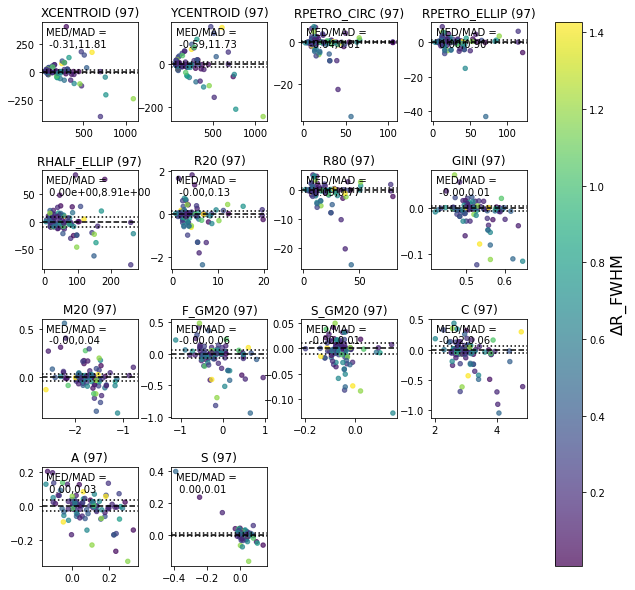

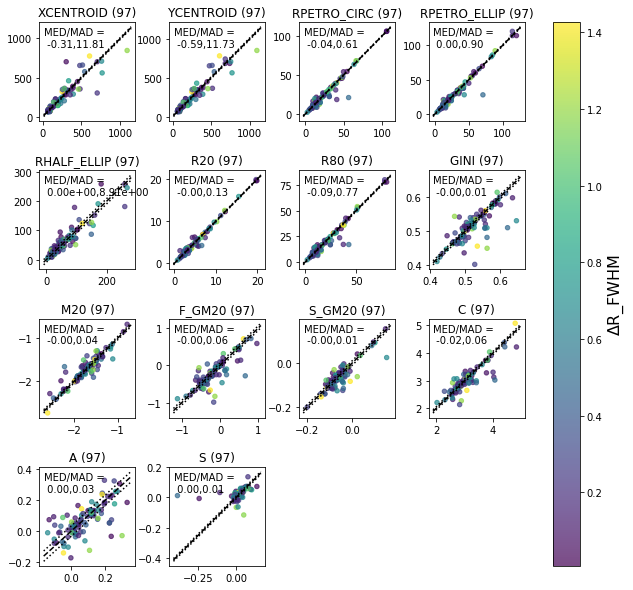

In [10]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph()

### Halpha Results

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

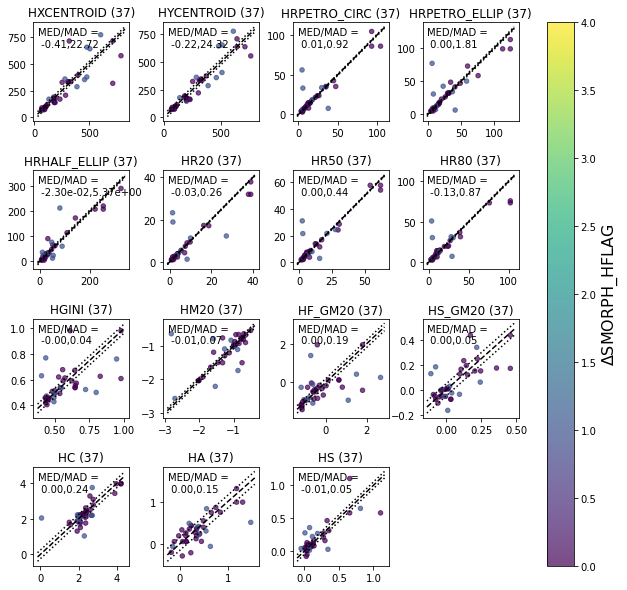

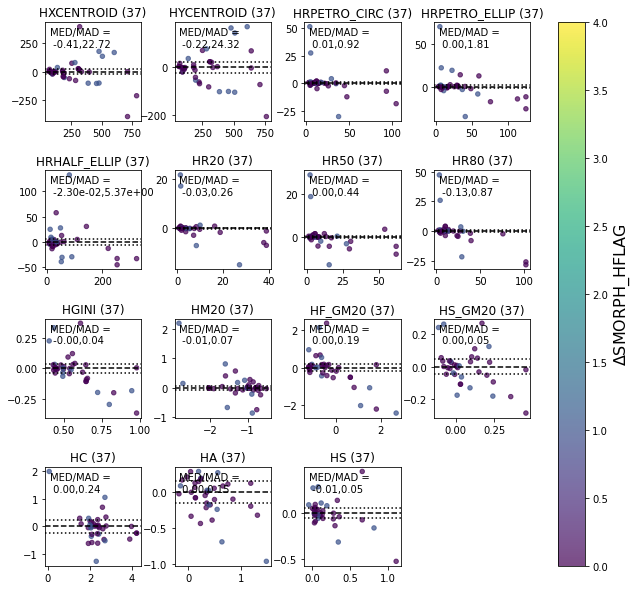

In [9]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph()

In [2]:
10/455


0.02197802197802198

# TODOs

* why is M24, M25, M26 rounded to 0.1 mag?
* make seperate flags for galfit, sizes, mags, statmorph

In [24]:
4.14*(630+238)/60


59.89199999999999

In [23]:
2516/60


41.93333333333333

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 720x720 with 0 Axes>

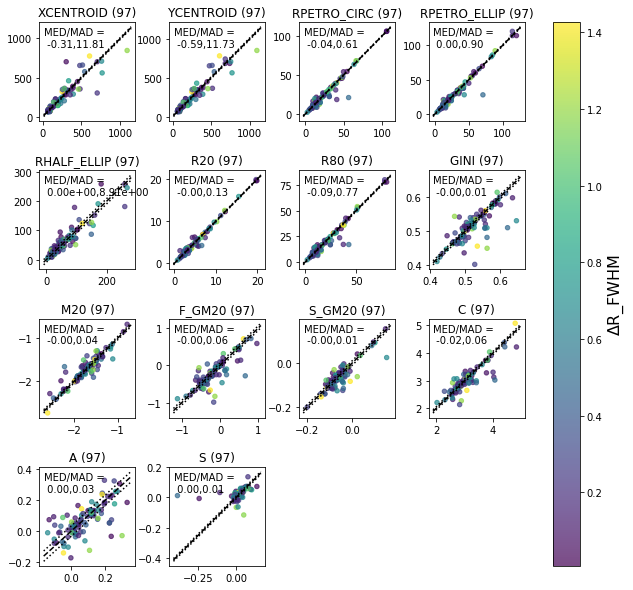

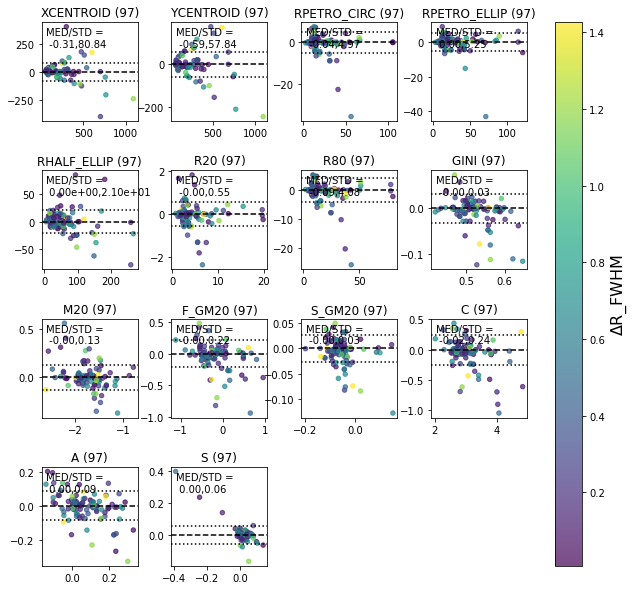

In [215]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph(rsmorphmaxflag=2)

* look at outliers individually to see why they are so different
* select better observation for FWHM, skynoise, filter correction

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

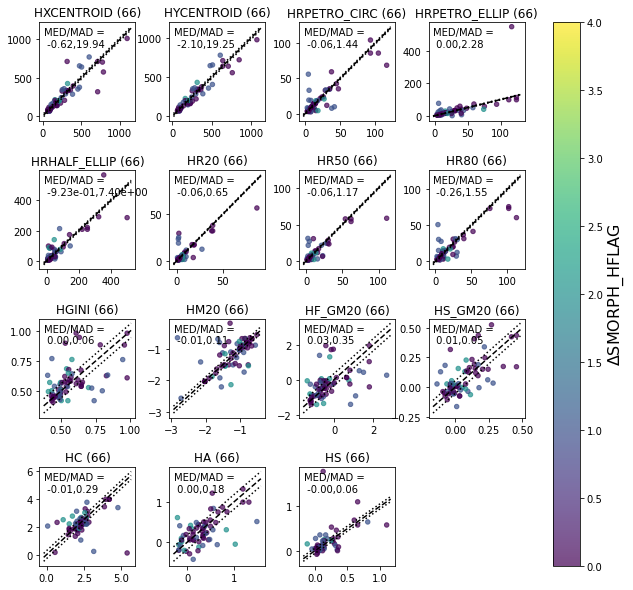

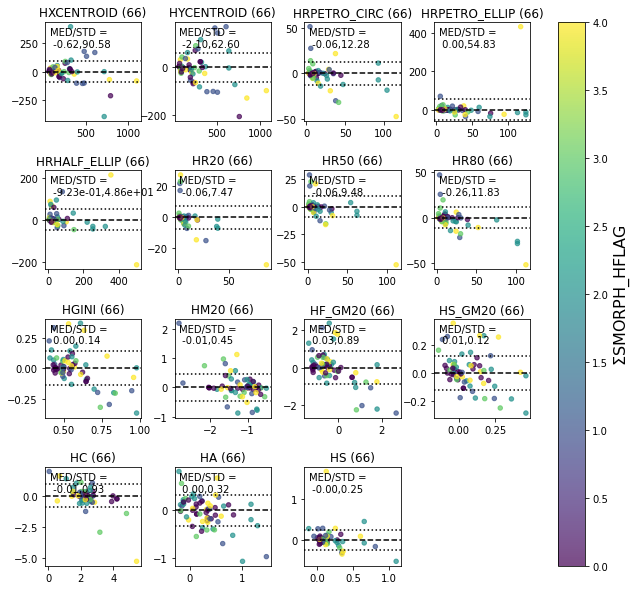

In [213]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph(hsmorphmaxflag=3)


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

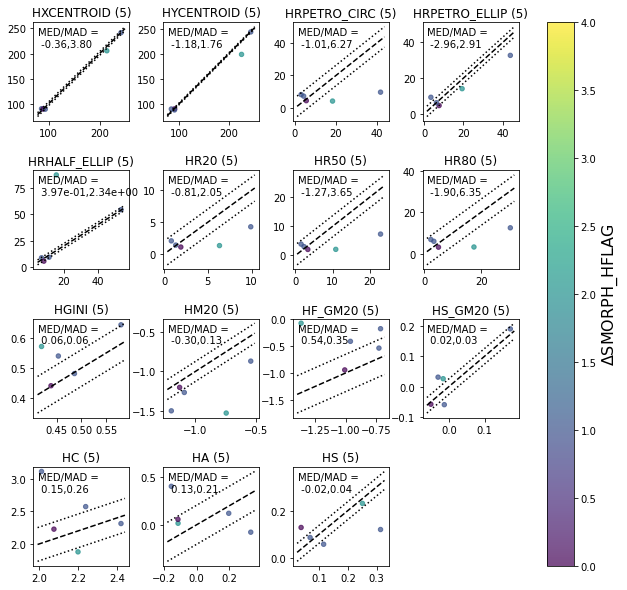

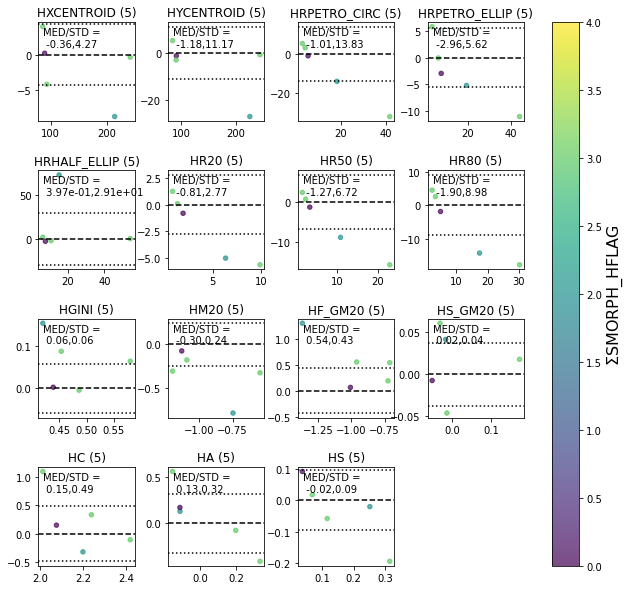

In [192]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph(hsmorphmaxflag=3,keep_tel='INT')


In [123]:
hflag = (d.htab['SMORPH_HFLAG'] < 3)& (d.htab['SMORPH_HXCENTROID'] >1)
print(f"number with good halpha statmorph = {np.sum(hflag)}")

rflag = (d.htab['SMORPH_FLAG'] < 1) & (d.htab['SMORPH_XCENTROID'] >1)
print(f"number with good rband statmorph = {np.sum(rflag)}")


print(f"number with good halpha AND rband statmorph = {np.sum(hflag & rflag)}")

number with good halpha statmorph = 559
number with good rband statmorph = 568
number with good halpha AND rband statmorph = 486


In [117]:
oddflag = hflag & ~rflag


In [118]:
d.htab['VFID','TEL'][oddflag]

<Table length=23>
  VFID    TEL  
 bytes8  bytes3
-------- ------
VFID1793    BOK
VFID1807    BOK
VFID1807    BOK
VFID1957    BOK
VFID2144    HDI
VFID2165    BOK
VFID2591    BOK
VFID2615    INT
VFID2670    INT
VFID2691    INT
     ...    ...
VFID3103    HDI
VFID3116    BOK
VFID3235    INT
VFID3437    INT
VFID5804    INT
VFID6338    MOS
VFID6350    INT
VFID6409    MOS
VFID6434    MOS
VFID6552    MOS

In [72]:
d.htab['VFID','TEL'][hflag & rflag]

<Table length=297>
  VFID    TEL  
 bytes8  bytes3
-------- ------
VFID0377    BOK
VFID0422    BOK
VFID0469    BOK
VFID0474    BOK
VFID0487    BOK
VFID0531    BOK
VFID0568    BOK
VFID0569    INT
VFID0569    BOK
VFID0602    BOK
     ...    ...
VFID6329    MOS
VFID6338    INT
VFID6342    MOS
VFID6362    MOS
VFID6380    INT
VFID6429    MOS
VFID6437    MOS
VFID6552    BOK
VFID6590    MOS
VFID6603    INT

In [119]:
i = d.htab['VFID'] == 'VFID0473'
d.htab['SMORPH_FLAG','SMORPH_HFLAG'][i]

<Table length=2>
SMORPH_FLAG SMORPH_HFLAG
   int32       int32    
----------- ------------
          0            2
          0            2

# Next Steps

* compare halpha-rband ratios for duplicates
  * R50 
  * R80
  * RMAX_ELLIP
  * RMAX_CIRC
  * flux ratio ellip
  * Gini
  * M20
  * CAS
  

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

Number that meet r and halpha SMORPH flags = 31


<Figure size 432x288 with 0 Axes>

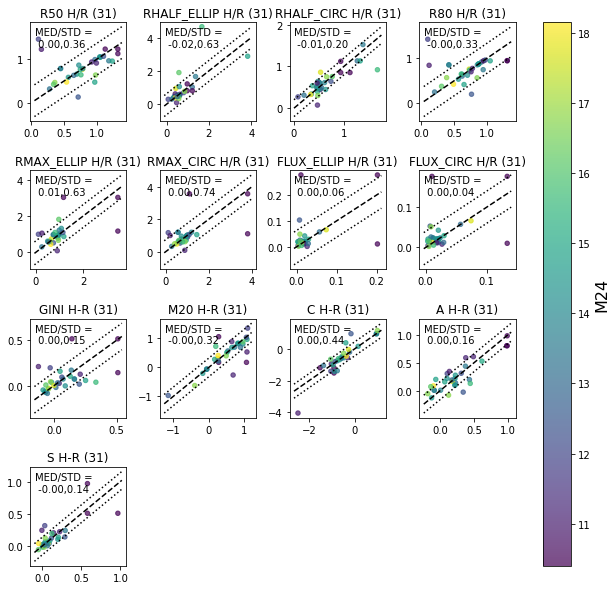

In [171]:
%run ~/github/havirgo/python/duplicates.py
d.compare_ratios(hsmorphmaxflag=2,rsmorphmaxflag=2)


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

Number that meet r and halpha SMORPH flags = 55


<Figure size 432x288 with 0 Axes>

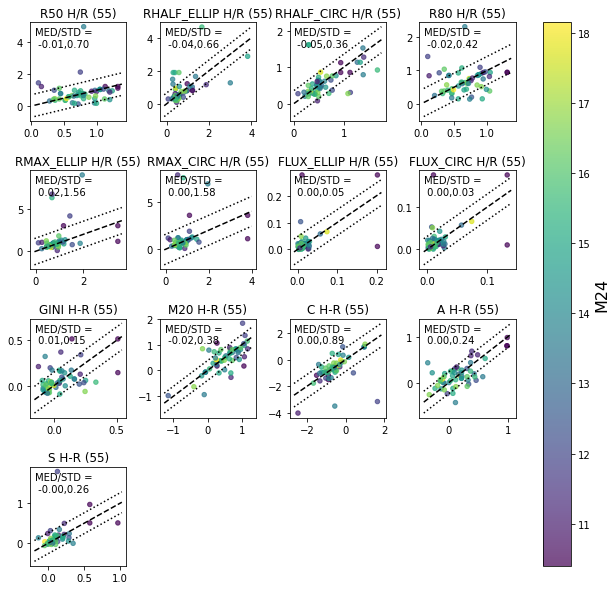

In [173]:
%run ~/github/havirgo/python/duplicates.py
d.compare_ratios(hsmorphmaxflag=3,rsmorphmaxflag=2)


# How to Handle Duplicates

* Once we make the statmorph cuts, we have 31 (flag cuts 2,2) or 55 (flag cuts 3,3) duplicates.
* Is it worth all the effort to keep these in the sample, vs go through and pick the best one?

* Let's look at a few and see if there is an obvious choice in terms of FWHM, depth, noise in image...

In [182]:
keepflag = flag[d.dupindex1] & flag[d.dupindex2]
dupindex1 = d.dupindex1[keepflag]
dupindex2 = d.dupindex2[keepflag]
for i in range(len(dupindex1)):
    print(f"{d.htab['TEL'][dupindex1[i]]}:{d.htab['H_FWHM'][dupindex1[i]]:.2f}, {d.htab['TEL'][dupindex2[i]]}:{d.htab['H_FWHM'][dupindex2[i]]:.2f}")

BOK:1.62, INT:1.27
INT:1.27, BOK:1.62
INT:1.20, BOK:2.00
BOK:1.99, INT:1.35
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
BOK:1.86, INT:1.73
BOK:1.70, BOK:1.67
HDI:1.71, BOK:1.46
BOK:1.46, HDI:1.71
BOK:1.44, BOK:1.39
BOK:1.44, BOK:1.39
BOK:1.39, BOK:1.44
BOK:1.39, BOK:1.44
BOK:1.39, BOK:1.44
BOK:1.39, HDI:1.32
BOK:1.39, BOK:1.44
HDI:1.32, BOK:1.44
BOK:1.39, HDI:1.32
BOK:1.39, BOK:1.44
HDI:1.32, BOK:1.44
BOK:1.44, HDI:1.32
HDI:2.37, BOK:1.61
HDI:2.37, BOK:1.61
HDI:2.37, HDI:1.99
BOK:1.61, HDI:1.99
HDI:2.37, BOK:1.61
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.29
HDI:2.37, HDI:2.29
BOK:1.61, HDI:2.29
HDI:2.29, HDI:1.32
HDI:2.29, BOK:1.61
HDI:1.32, BOK:1.61
INT:2.22, BOK:2.41
INT:2.22, BOK:2.41
HDI:1.95, BOK:1.52
INT:2.34, BOK:1.74
BOK:1.74, INT:2.34
INT:1.08, HDI:2.37
INT:1.11, INT:1.11
INT:1.18, BOK:1.56
BOK:1.69, HDI:1.45
BOK:1.69, BOK:1.55
HDI:1.45, BOK:1.55
HDI:1.45, BOK:1.69
HDI:1.57, INT:1.45
HDI:1.57, INT:1.45
HDI:2.52, IN

# Merging with Full Catalog

In [206]:
%run ~/github/havirgo/python/duplicates.py
d.remove_duplicates()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

VFID0473

		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0481



/Users/rfinn/github/havirgo/python/duplicates.py:456: RuntimeWarning: divide by zero encountered in log10
  rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
/Users/rfinn/github/havirgo/python/duplicates.py:457: RuntimeWarning: divide by zero encountered in log10
  hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))


		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0483

		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0569

		 Winner by filter correction =  VF-235.203+59.547-BOK-20220424-VFID0607

VFID0782

		 Winner by filter correction =  VF-266.477+58.350-BOK-20220423-VFID0783

VFID1587

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1588

listofwinners =  [77, 77, 77, 78, 77, 78]
		 Overall winner by mode  VF-202.276+46.486-HDI-20170523-p023

VFID1589

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1593

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1595

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1604

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1605

listofwinners =  [88, 89, 88, 88, 89, 88, 89]
		 Overall winner by mode  VF-202.276+46.486-HDI-20170523-p023

VFID1726

		 Winner by image 

# Updates from 2025-May-20

* I have updated statmorph to use the same segmentation image for r-band and halpha, and for gini coefficient measurements.

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

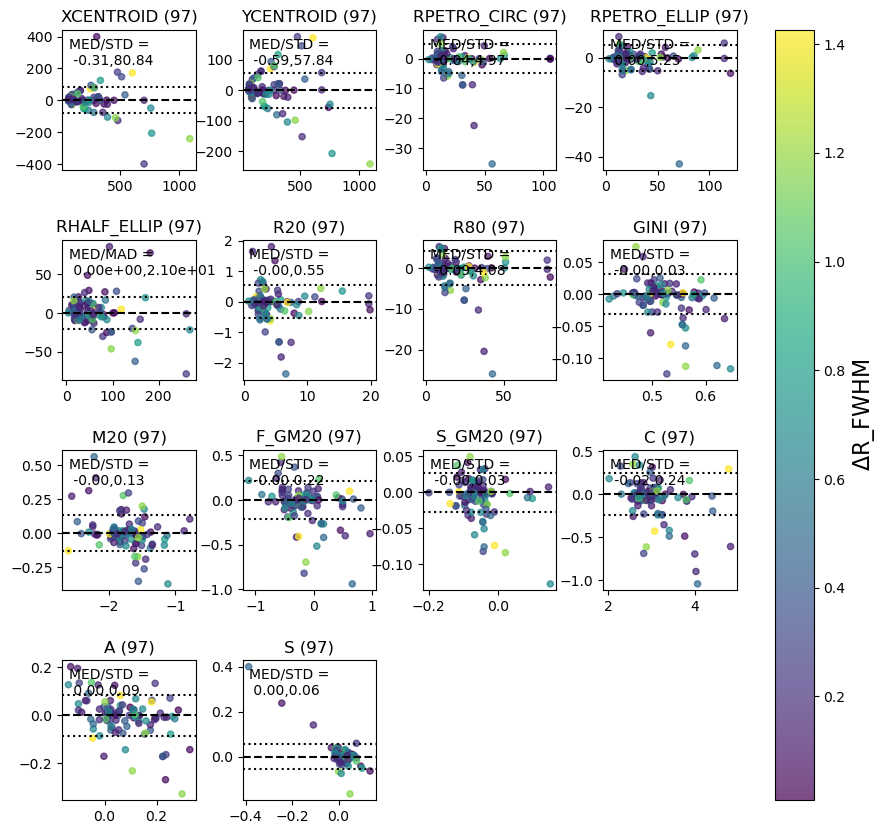

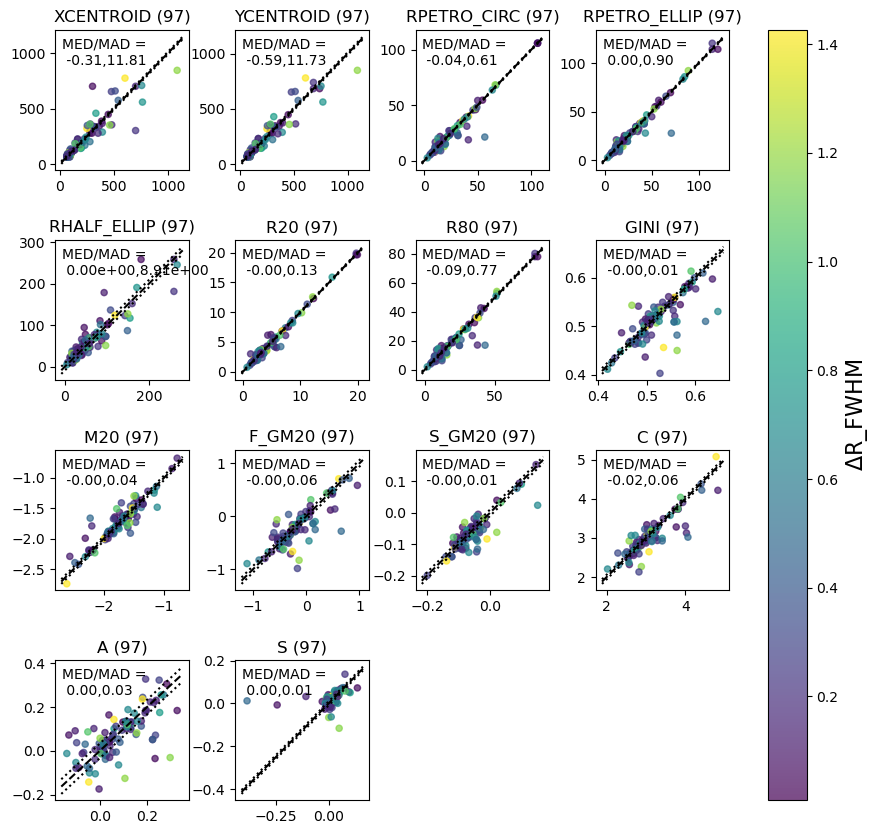

In [176]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
#%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph(rsmorphmaxflag=2)
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

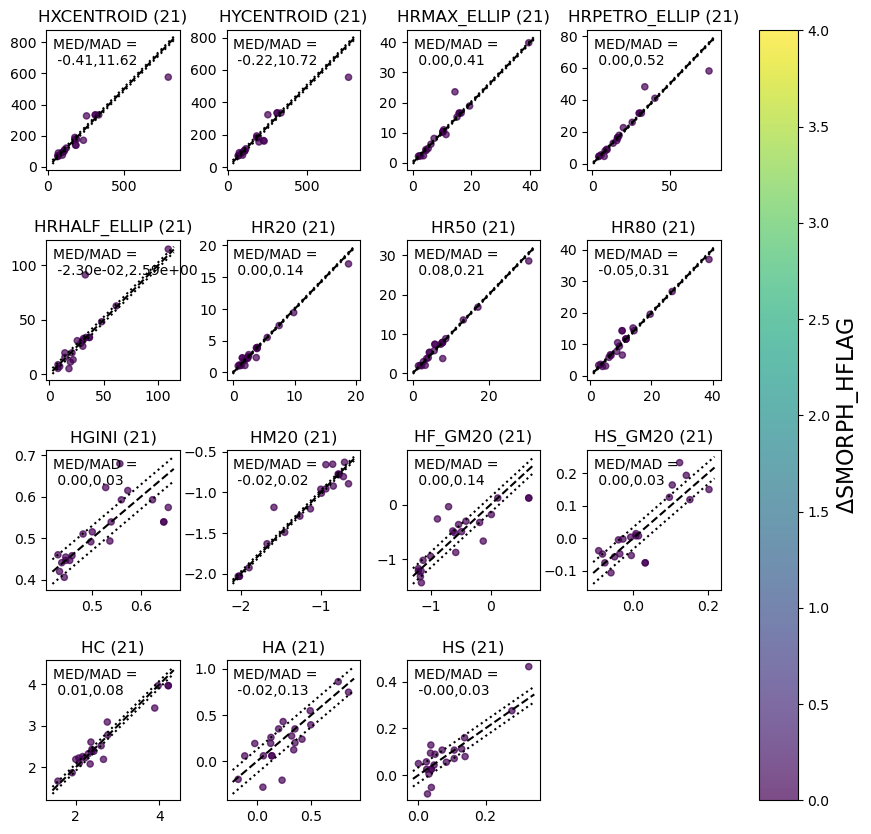

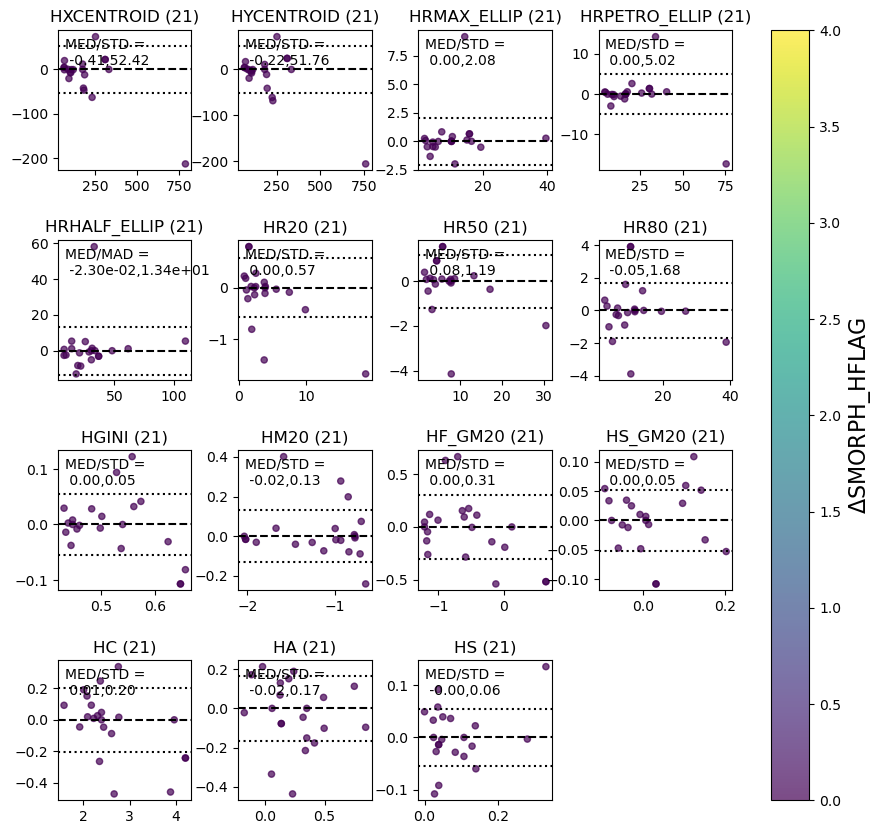

In [179]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
#%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph(hsmorphmaxflag=1)#,keep_tel='HDI')
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
number that meet halpha and r smorph flag =  289


<Figure size 640x480 with 0 Axes>

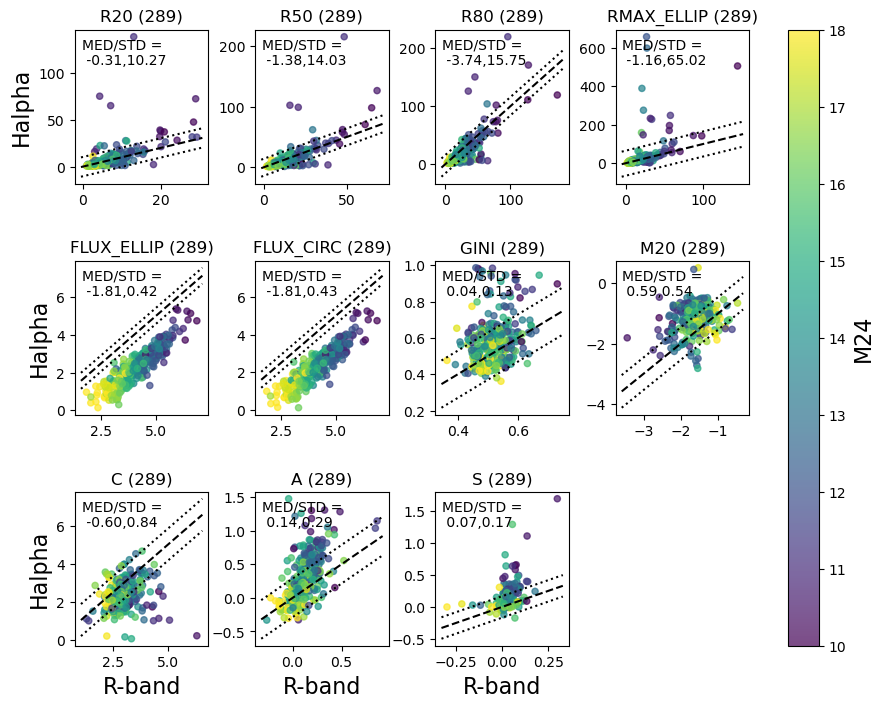

In [180]:
%run ~/github/havirgo/python/duplicates.py
d.compare_ratios(hsmorphmaxflag=2,rsmorphmaxflag=2)
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

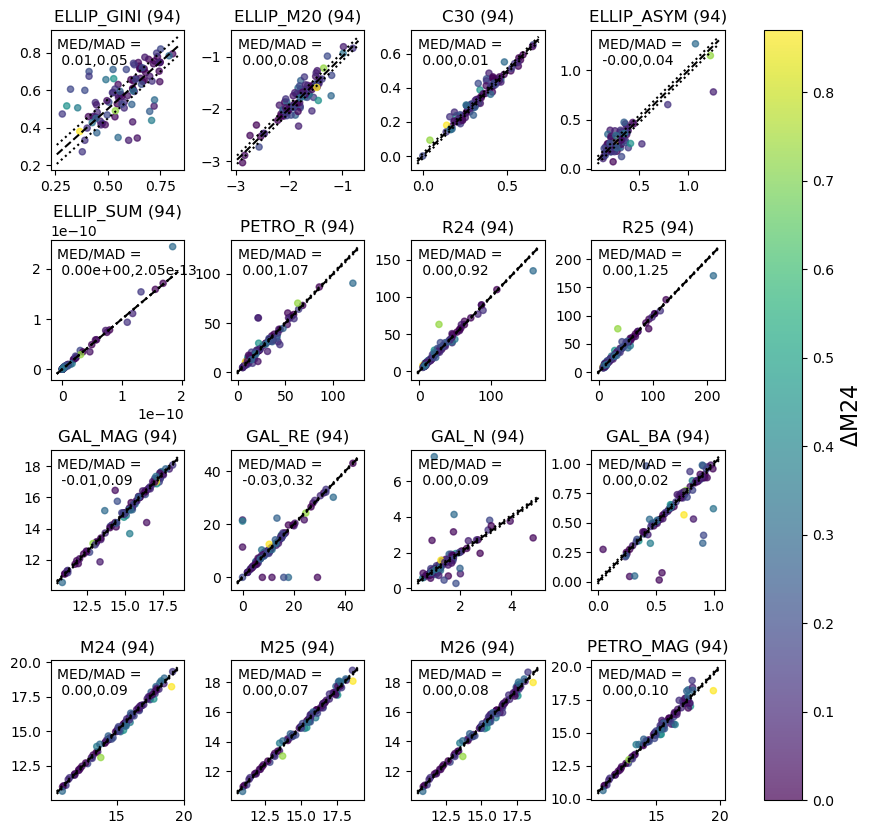

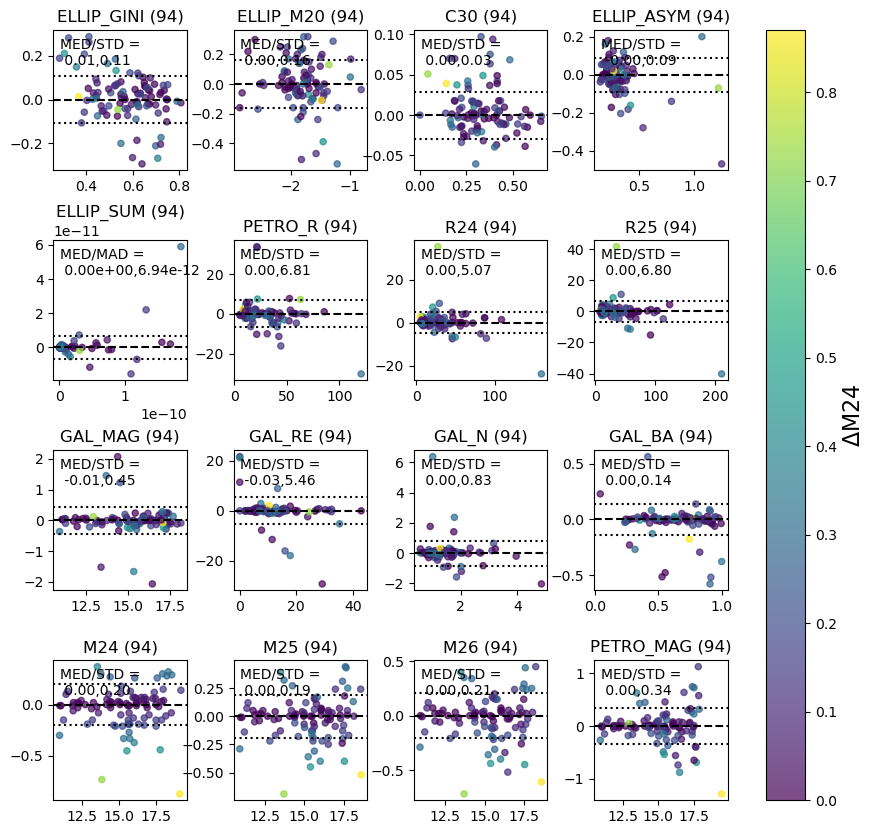

In [41]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams()
d.plot_rparams_residuals()
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

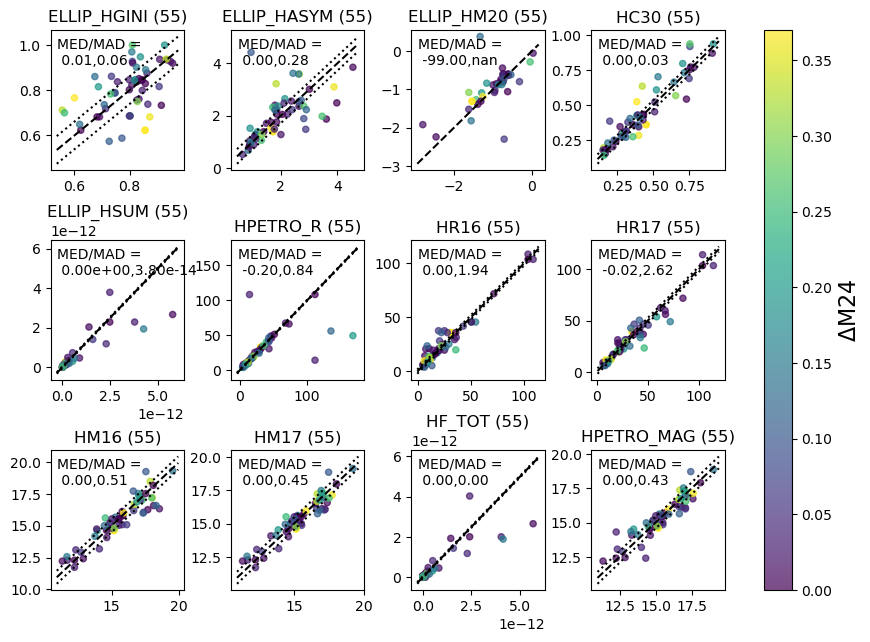

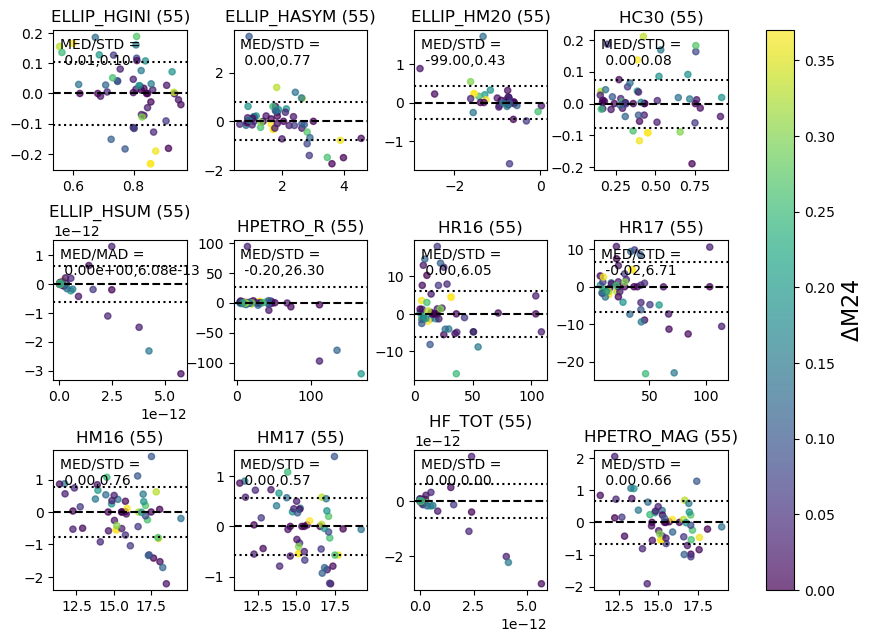

In [42]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams()
d.plot_hparams_residuals()
plt.show()

# Duplicates 

* careful plots of total flux in r and halph
* difference in FWHM
* difference in sky noise
* compare centroids
* determine what we can measure reliably - gini is not on the list!
* look for systematics with a particular telescope
* filter correction - are we doing this right?  what do plots look like if we keep filter cor < 1.05?

# Going back to previous halpha measurements

* the statmorph changes made the Gini coefficient less reliable, so going back to fall 2024 version
*  

In [40]:
hflag = (d.htab['SMORPH_HFLAG'] < 3)& (d.htab['SMORPH_HXCENTROID'] >1)
print(f"number with good halpha statmorph = {np.sum(hflag)}")

rflag = (d.htab['SMORPH_FLAG'] < 1) & (d.htab['SMORPH_XCENTROID'] >1)
print(f"number with good rband statmorph = {np.sum(rflag)}")


print(f"number with good halpha AND rband statmorph = {np.sum(hflag & rflag)}")

number with good halpha statmorph = 638
number with good rband statmorph = 550
number with good halpha AND rband statmorph = 465


# Total Flux

In [52]:
for i in range(len(d.dupindex1)):
    vfindex1 = d.htab['VFINDEX'][d.dupindex1[i]]
    vfindex2 = d.htab['VFINDEX'][d.dupindex2[i]]
    #print(vfindex1)
    vfid_diff = vfindex1 - vfindex2
    print(i, vfid_diff, d.v.main['VFID'][vfindex1], d.v.main['VFID'][vfindex2]) 

0 0 VFID0473 VFID0473
1 0 VFID0481 VFID0481
2 0 VFID0483 VFID0483
3 0 VFID0569 VFID0569
4 0 VFID0782 VFID0782
5 0 VFID1587 VFID1587
6 0 VFID1588 VFID1588
7 0 VFID1589 VFID1589
8 0 VFID1593 VFID1593
9 0 VFID1595 VFID1595
10 0 VFID1604 VFID1604
11 0 VFID1605 VFID1605
12 0 VFID1726 VFID1726
13 0 VFID1802 VFID1802
14 0 VFID1807 VFID1807
15 0 VFID1819 VFID1819
16 0 VFID1954 VFID1954
17 0 VFID1964 VFID1964
18 0 VFID2011 VFID2011
19 0 VFID2039 VFID2039
20 0 VFID2040 VFID2040
21 0 VFID2049 VFID2049
22 0 VFID2055 VFID2055
23 0 VFID2057 VFID2057
24 0 VFID2057 VFID2057
25 0 VFID2057 VFID2057
26 0 VFID2072 VFID2072
27 0 VFID2076 VFID2076
28 0 VFID2076 VFID2076
29 0 VFID2076 VFID2076
30 0 VFID2083 VFID2083
31 0 VFID2083 VFID2083
32 0 VFID2083 VFID2083
33 0 VFID2086 VFID2086
34 0 VFID2089 VFID2089
35 0 VFID2091 VFID2091
36 0 VFID2095 VFID2095
37 0 VFID2095 VFID2095
38 0 VFID2095 VFID2095
39 0 VFID2099 VFID2099
40 0 VFID2101 VFID2101
41 0 VFID2118 VFID2118
42 0 VFID2135 VFID2135
43 0 VFID2138 VFID213

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

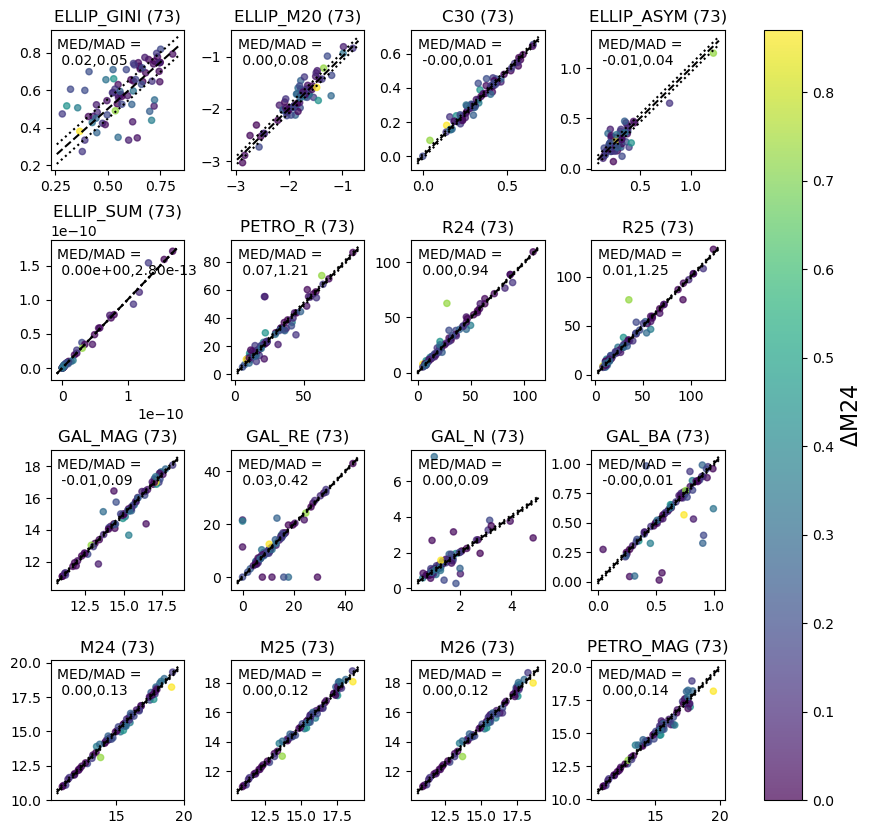

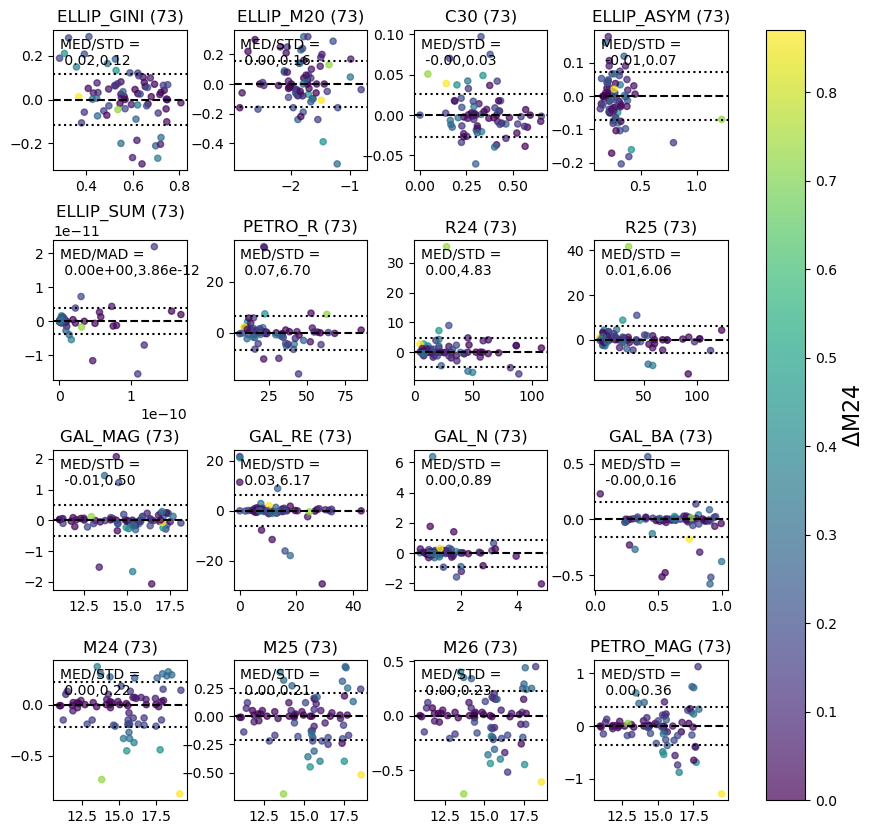

In [55]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams(filterflag=True)
d.plot_rparams_residuals(filterflag=True)
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
SignificanceResult(statistic=0.6595424073588921, pvalue=1.85676147881843e-20)
SignificanceResult(statistic=0.7762374481232718, pvalue=4.636191873414555e-32)
SignificanceResult(statistic=0.7866929296275783, pvalue=1.9224791696590238e-33)
SignificanceResult(statistic=0.724868523566578, pvalue=3.2308340601811875e-26)
could not find column SMORPH_HFLUX_CIRC_ERR
SignificanceResult(statistic=0.7269120363916844, pvalue=2.0067684097186335e-26)
could not find column SMORPH_HFLUX_ELLIP_ERR
SignificanceResult(statistic=0.7095859273510213, pvalue=9.978617608702084e-25)


<Figure size 640x480 with 0 Axes>

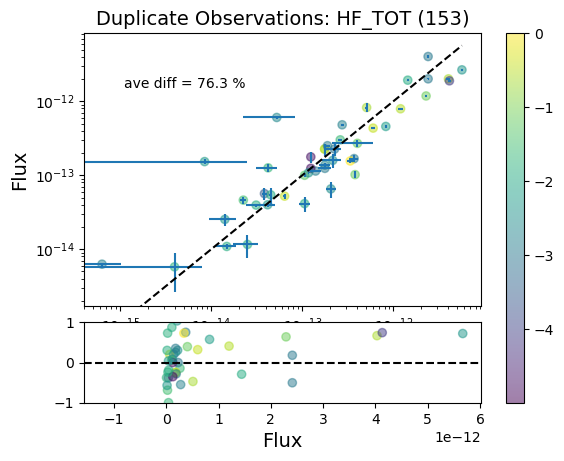

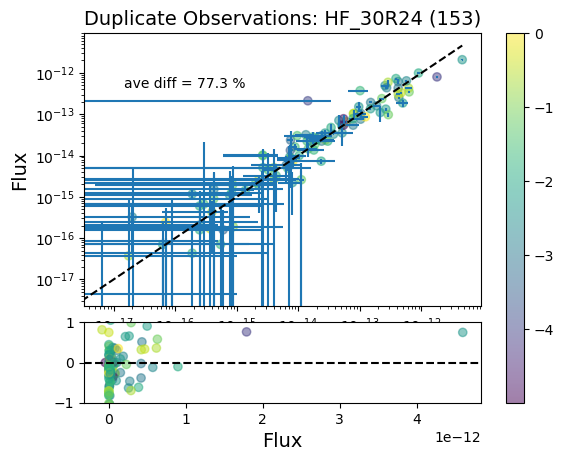

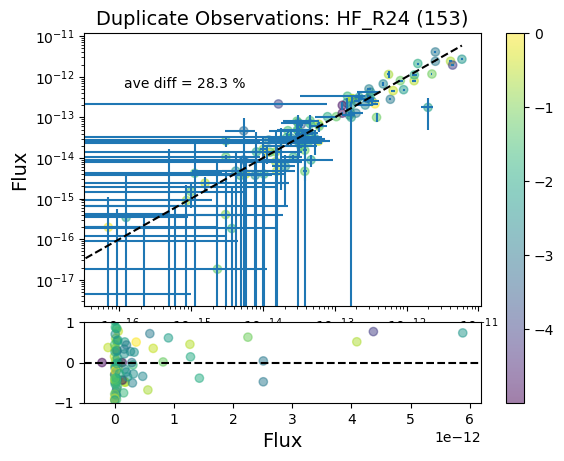

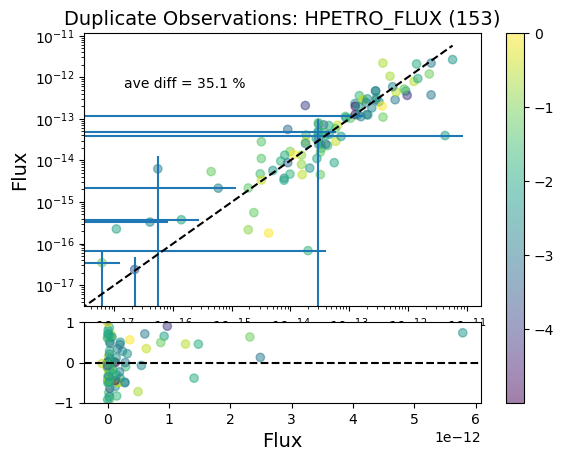

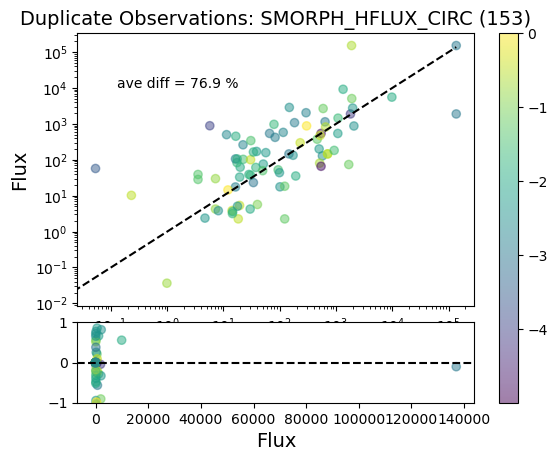

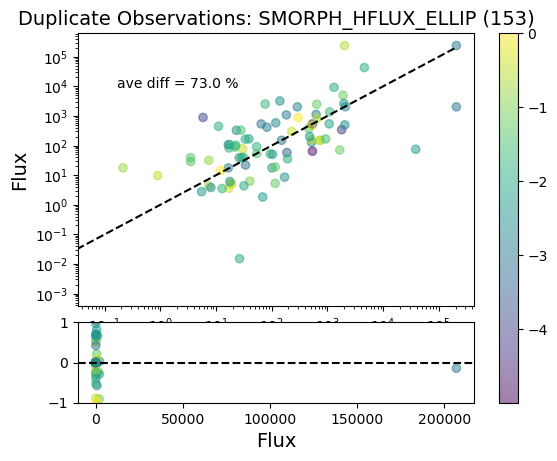

In [188]:
%run ~/github/havirgo/python/duplicates.py
vfindex1 = d.htab['VFINDEX'][d.dupindex1]
vfindex2 = d.htab['VFINDEX'][d.dupindex2]
#print(vfindex1)

smorphflag = 5
cols = ['HF_TOT','HF_30R24','HF_R24','HPETRO_FLUX','SMORPH_HFLUX_CIRC','SMORPH_HFLUX_ELLIP']
for c in cols:
    fig = plt.figure()

    gs = GridSpec(4, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:3,:])

    ax2 = fig.add_subplot(gs[-1,:])
    x = d.htab[c]

    flag = np.ones(len(x[d.dupindex1]),'bool')
    flag = (d.htab['SMORPH_HFLAG'][d.dupindex1] < smorphflag) & (d.htab['SMORPH_HFLAG'][d.dupindex2] < smorphflag)
    plt.sca(ax1)
    plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)

    colorcol = d.v.magphys['logSFR_med']
    plt.scatter(x[d.dupindex1][flag],x[d.dupindex2][flag],c = colorcol[d.dupindex1][flag],alpha=.5)
    plt.colorbar(ax=[ax1,ax2])
    try:
        xerr = np.abs(d.htab[c+'_ERR'])
        plt.errorbar(x[d.dupindex1],x[d.dupindex2],xerr=xerr[d.dupindex1],yerr=xerr[d.dupindex2],fmt='None')
    except:
        print("could not find column " + c+'_ERR')
    xline = np.linspace(np.min(x[d.dupindex1]),np.max(x[d.dupindex1]),100)
    plt.plot(xline,xline,'k--')
    
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    #plt.axis([-1e-13,1e-12,-1e-13,1e-12])
    
    #plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)

    plt.ylabel("Flux",fontsize=14)
    
    print(scipy.stats.spearmanr(x[d.dupindex1],x[d.dupindex2]))
    
    dx = (x[d.dupindex1] - x[d.dupindex2])
    xave = (x[d.dupindex1] + x[d.dupindex2])/2
    pcent_diff = np.nanmean(np.abs(dx[flag])/xave[flag])
    plt.text(0.1,.8,f"ave diff = {pcent_diff*100:.1f} %",transform=plt.gca().transAxes) 
    #pcent_diff = MAD(np.abs(dx)/xave, nan_policy='omit')
    #plt.text(0.1,.8,f"MAD % diff = {pcent_diff*100:.1f} %",transform=plt.gca().transAxes) 
    
    
    
    shaded_err = pcent_diff
    #plt.fill_between(xline, y1=(1 + shaded_err)*xline,y2=(1 - shaded_err)*xline,alpha=.5)

    # plot residuals
    plt.sca(ax2)
    plt.scatter(x[d.dupindex1],dx/xave,c = colorcol[d.dupindex1],alpha=.5)
    #plt.gca().set_xscale("log")
    plt.axhline(ls='--',color='k')
    plt.ylim(-1,1)
    plt.xlabel("Flux",fontsize=14)
    
plt.show()


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
SignificanceResult(statistic=0.8563949328026118, pvalue=2.8585292798325754e-38)


<Figure size 640x480 with 0 Axes>

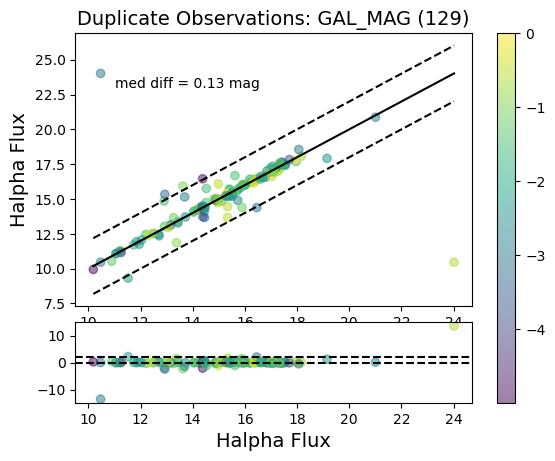

In [197]:
%run ~/github/havirgo/python/duplicates.py
vfindex1 = d.htab['VFINDEX'][d.dupindex1]
vfindex2 = d.htab['VFINDEX'][d.dupindex2]
#print(vfindex1)

cols = ['GAL_MAG']
for c in cols:
    fig = plt.figure()

    gs = GridSpec(4, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:3,:])

    ax2 = fig.add_subplot(gs[-1,:])
    x = d.htab[c]

    ################################
    ## extra selection 
    ################################
    flag = (x[d.dupindex1] > 1) & (x[d.dupindex2] > 1)

    ################################
    ## first plot
    ################################
    plt.sca(ax1)
    colorcol = d.v.magphys['logSFR_med']
    plt.scatter(x[d.dupindex1][flag],x[d.dupindex2][flag],c = colorcol[d.dupindex1][flag],alpha=.5)
    plt.colorbar(ax=[ax1,ax2])
    try:
        xerr = np.abs(d.htab[c+'_ERR'])
        #plt.errorbar(x[d.dupindex1],x[d.dupindex2],xerr=xerr[d.dupindex1],yerr=xerr[d.dupindex2],fmt='None')
    except:
        print("could not find column " + c+'_ERR')
    xline = np.linspace(np.min(x[d.dupindex1][flag]),np.max(x[d.dupindex1][flag]),100)
    plt.plot(xline,xline,'k-')
    
    plt.plot(xline,xline+2,'k--')
    plt.plot(xline,xline-2,'k--')
    #plt.gca().set_yscale("log")
    #plt.gca().set_xscale("log")
    xmin=7
    xmax=21
    #plt.axis([xmin,xmax,xmin,xmax])
    
    
    plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)
    plt.ylabel("Halpha Flux",fontsize=14)
    
    print(scipy.stats.spearmanr(x[d.dupindex1][flag],x[d.dupindex2][flag]))
    
    dx = (x[d.dupindex1] - x[d.dupindex2])
    xave = (x[d.dupindex1] + x[d.dupindex2])/2
    pcent_diff = np.nanmean(np.abs(dx[flag]))
    pcent_diff = np.nanmedian(np.abs(dx[flag]))
    plt.text(0.1,.8,f"med diff = {pcent_diff:.2f} mag",transform=plt.gca().transAxes) 
    
    shaded_err = pcent_diff
    #plt.fill_between(xline, y1=(1 + shaded_err)*xline,y2=(1 - shaded_err)*xline,alpha=.5)

    #plt.xticks([])

    ############################
    # plot residuals
    ############################
    plt.sca(ax2)
    plt.scatter(x[d.dupindex1][flag],dx[flag],c = colorcol[d.dupindex1][flag],alpha=.5)
    #plt.gca().set_xscale("log")
    plt.axhline(ls='--',color='k')
    plt.axhline(y=2,ls='--',color='k')
    #plt.xlim(xmin,xmax)
    #plt.ylim(-5,5)
    plt.xlabel("Halpha Flux",fontsize=14)
    
plt.show()


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
130 130 153 153
SignificanceResult(statistic=0.9829112238786446, pvalue=5.967140443640605e-96)
131 131 153 153
SignificanceResult(statistic=0.9857423507332334, pvalue=1.009396586797379e-101)


<Figure size 640x480 with 0 Axes>

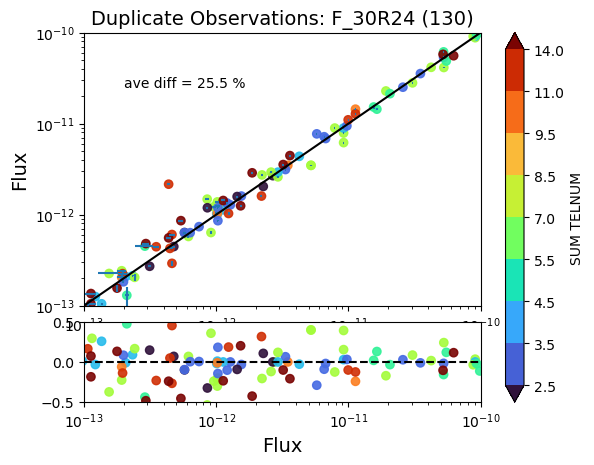

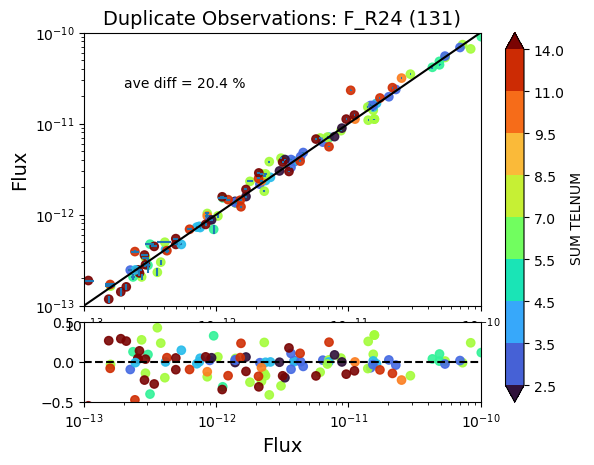

In [276]:
%run ~/github/havirgo/python/duplicates.py
vfindex1 = d.htab['VFINDEX'][d.dupindex1]
vfindex2 = d.htab['VFINDEX'][d.dupindex2]
#print(vfindex1)

cols = ['F_30R24','F_R24']

import matplotlib as mpl
cmap = mpl.cm.turbo
bounds = [2.5,3.5,4.5,5.5,7,8.5,9.5,11,14]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

for c in cols:
    fig = plt.figure()

    gs = GridSpec(4, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:3,:])

    ax2 = fig.add_subplot(gs[-1,:])
    x = d.htab[c]

    ################################
    ## extra selection 
    ################################
    flag = (x[d.dupindex1] > 0) & (x[d.dupindex2] > 0) #& (d.htab['TELNUM'][d.dupindex1] < 3) & (d.htab['TELNUM'][d.dupindex2] < 3) 

    ################################
    ## first plot
    ################################
    plt.sca(ax1)
    colorcol = d.v.magphys['logSFR_med'][d.hvfindex][d.dupindex1]
    colorcolumn = 'TELNUM'
    colorcol = np.abs(d.htab[colorcolumn][d.dupindex1] + d.htab[colorcolumn][d.dupindex2])
    cbar_label = "SUM TELNUM"
    print(len(x[d.dupindex1][flag]),len(colorcol[flag]),len(d.dupindex2),len(flag))
    plt.scatter(x[d.dupindex1][flag],x[d.dupindex2][flag],c = colorcol[flag],alpha=.9, cmap=cmap)
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=[ax1,ax2], label=cbar_label)
    try:
        xerr = np.abs(d.htab[c+'_ERR'])
        plt.errorbar(x[d.dupindex1],x[d.dupindex2],xerr=xerr[d.dupindex1],yerr=xerr[d.dupindex2],fmt='None')
    except:
        print("could not find column " + c+'_ERR')
    xline = np.linspace(np.min(x[d.dupindex1][flag]),np.max(x[d.dupindex1][flag]),100)
    plt.plot(xline,xline,'k-')
    
    #plt.plot(xline,xline+2,'k--')
    #plt.plot(xline,xline-2,'k--')
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    xmin=1e-13
    xmax=1e-10
    plt.axis([xmin,xmax,xmin,xmax])
    
    plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)

    plt.ylabel("Flux",fontsize=14)
    
    print(scipy.stats.spearmanr(x[d.dupindex1][flag],x[d.dupindex2][flag]))
    
    dx = (x[d.dupindex1] - x[d.dupindex2])
    xave = (x[d.dupindex1] + x[d.dupindex2])/2
    pcent_diff = np.nanmean(np.abs(dx[flag])/xave[flag])
    plt.text(0.1,.8,f"ave diff = {pcent_diff*100:.1f} %",transform=plt.gca().transAxes) 
    
    shaded_err = pcent_diff
    #plt.fill_between(xline, y1=(1 + shaded_err)*xline,y2=(1 - shaded_err)*xline,alpha=.5)

    #plt.xticks([])

    ############################
    # plot residuals
    ############################
    plt.sca(ax2)
    plt.scatter(x[d.dupindex1][flag],dx[flag]/xave[flag],c = colorcol[flag],alpha=.9, cmap=cmap)
    #plt.gca().set_xscale("log")
    plt.axhline(ls='--',color='k')
    #plt.axhline(y=2,ls='--',color='k')
    plt.xlim(xmin,xmax)
    plt.ylim(-.5,.5)
    plt.xlabel("Flux",fontsize=14)

    #plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
plt.show()


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
102 102 153 153
SignificanceResult(statistic=0.9630739653048352, pvalue=8.517838445909185e-59)
94 94 153 153
SignificanceResult(statistic=0.9170360577637535, pvalue=1.6807941572117397e-38)


<Figure size 640x480 with 0 Axes>

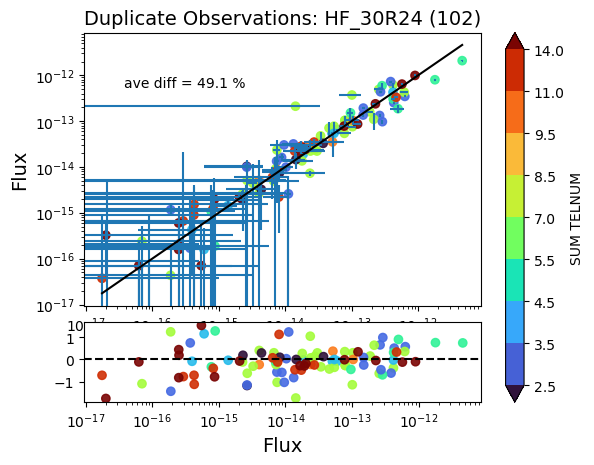

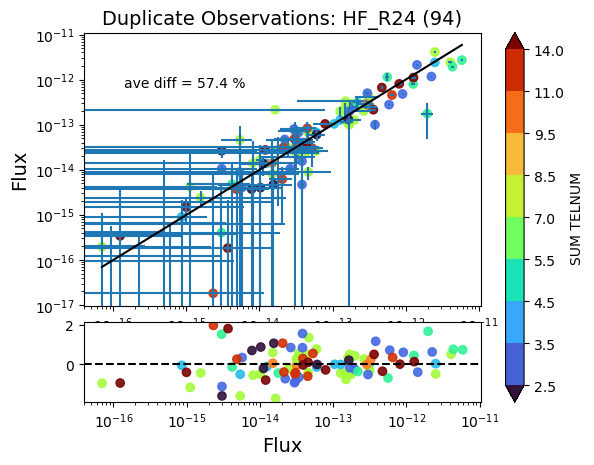

In [284]:
%run ~/github/havirgo/python/duplicates.py
vfindex1 = d.htab['VFINDEX'][d.dupindex1]
vfindex2 = d.htab['VFINDEX'][d.dupindex2]
#print(vfindex1)

cols = ['HF_30R24','HF_R24']

import matplotlib as mpl
cmap = mpl.cm.turbo
bounds = [2.5,3.5,4.5,5.5,7,8.5,9.5,11,14]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

for c in cols:
    fig = plt.figure()

    gs = GridSpec(4, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:3,:])

    ax2 = fig.add_subplot(gs[-1,:])
    x = d.htab[c]

    ################################
    ## extra selection 
    ################################
    flag = (x[d.dupindex1] > 0) & (x[d.dupindex2] > 0) #& (d.htab['TELNUM'][d.dupindex1] < 3) & (d.htab['TELNUM'][d.dupindex2] < 3) 

    ################################
    ## first plot
    ################################
    plt.sca(ax1)
    colorcol = d.v.magphys['logSFR_med'][d.hvfindex][d.dupindex1]
    colorcolumn = 'TELNUM'
    colorcol = np.abs(d.htab[colorcolumn][d.dupindex1] + d.htab[colorcolumn][d.dupindex2])
    cbar_label = "SUM TELNUM"
    print(len(x[d.dupindex1][flag]),len(colorcol[flag]),len(d.dupindex2),len(flag))
    plt.scatter(x[d.dupindex1][flag],x[d.dupindex2][flag],c = colorcol[flag],alpha=.9, cmap=cmap)
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=[ax1,ax2], label=cbar_label)
    try:
        xerr = np.abs(d.htab[c+'_ERR'])
        plt.errorbar(x[d.dupindex1],x[d.dupindex2],xerr=xerr[d.dupindex1],yerr=xerr[d.dupindex2],fmt='None')
    except:
        print("could not find column " + c+'_ERR')
    xline = np.linspace(np.min(x[d.dupindex1][flag]),np.max(x[d.dupindex1][flag]),100)
    plt.plot(xline,xline,'k-')
    
    #plt.plot(xline,xline+2,'k--')
    #plt.plot(xline,xline-2,'k--')
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    xmin=1e-15
    xmax=1e-11
    #plt.axis([xmin,xmax,xmin,xmax])
    
    plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)

    plt.ylabel("Flux",fontsize=14)
    
    print(scipy.stats.spearmanr(x[d.dupindex1][flag],x[d.dupindex2][flag]))
    
    dx = (x[d.dupindex1] - x[d.dupindex2])
    xave = (x[d.dupindex1] + x[d.dupindex2])/2
    pcent_diff = np.nanmean(np.abs(dx[flag])/xave[flag])
    plt.text(0.1,.8,f"ave diff = {pcent_diff*100:.1f} %",transform=plt.gca().transAxes) 
    
    shaded_err = pcent_diff
    #plt.fill_between(xline, y1=(1 + shaded_err)*xline,y2=(1 - shaded_err)*xline,alpha=.5)

    #plt.xticks([])

    ############################
    # plot residuals
    ############################
    plt.sca(ax2)
    plt.scatter(x[d.dupindex1][flag],dx[flag]/xave[flag],c = colorcol[flag],alpha=.9, cmap=cmap)
    #plt.gca().set_xscale("log")
    plt.axhline(ls='--',color='k')
    #plt.axhline(y=2,ls='--',color='k')
    #plt.xlim(xmin,xmax)
    #plt.ylim(-.5,.5)
    plt.xlabel("Flux",fontsize=14)

    #plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
plt.show()



# After talking with Greg, Tuesday 5/27/2025

## TODO

* flux calibration - compare profiles in fixed aperture
  * overlay profiles
  * maybe make a webpage showing all params for duplicates?
* compare R24 - how reliable are they
* structural parameters seem relatively good
* where is R24 on the halpha images - can we overplot


# Compare GALFIT vs Photutils Geometry

* ELLIP_EPS, ELLIP_THETA, GAL_BA, GAL_PA

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153
could not find column ELLIP_EPS_ERR
SignificanceResult(statistic=0.9031941896865089, pvalue=2.465156525577116e-57)
could not find column ELLIP_THETA_ERR
SignificanceResult(statistic=0.8440859090123898, pvalue=1.0316437818875641e-42)
SignificanceResult(statistic=0.9869454428139249, pvalue=2.087019793466969e-99)
SignificanceResult(statistic=0.7618853283839083, pvalue=1.024221861760624e-25)
SignificanceResult(statistic=0.9349147758115296, pvalue=2.508720431182623e-22)


<Figure size 640x480 with 0 Axes>

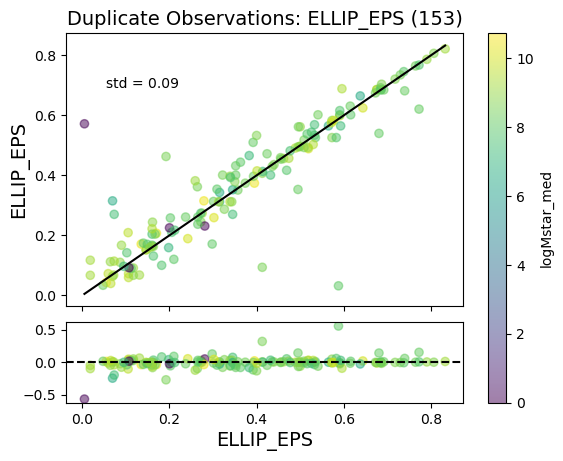

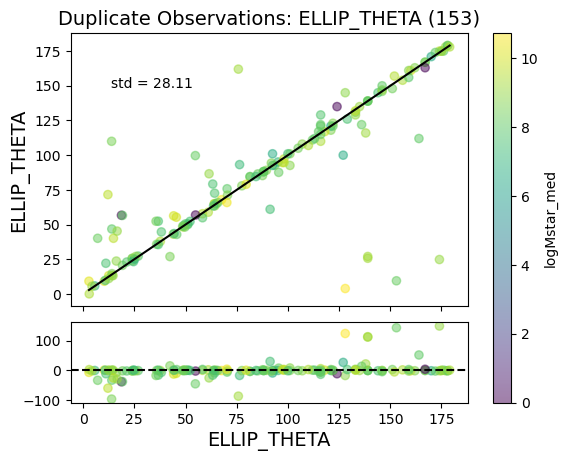

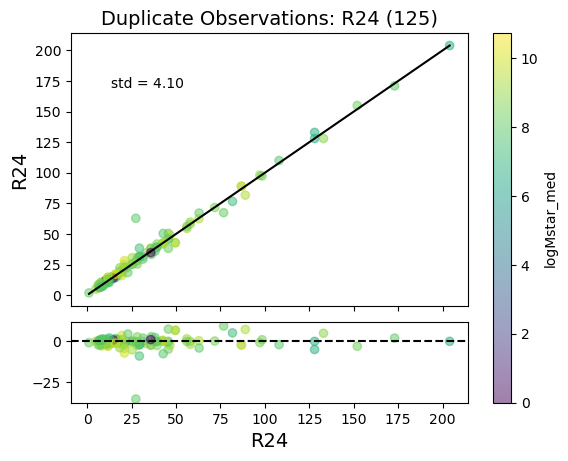

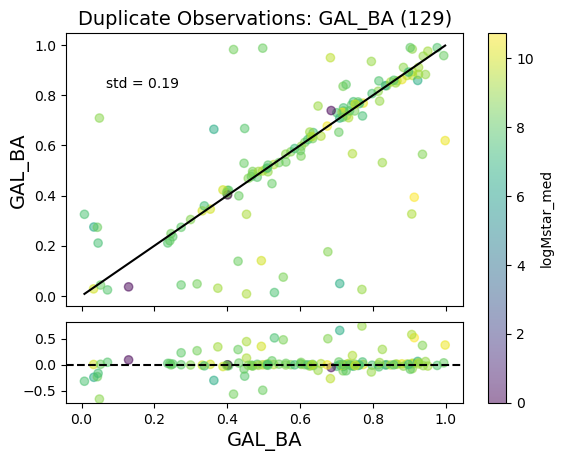

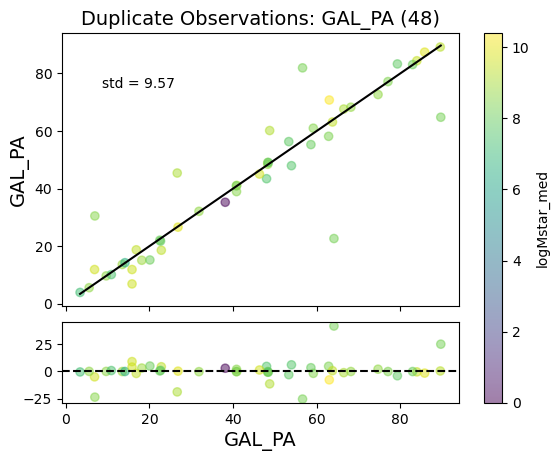

In [217]:
%run ~/github/havirgo/python/duplicates.py
vfindex1 = d.htab['VFINDEX'][d.dupindex1]
vfindex2 = d.htab['VFINDEX'][d.dupindex2]
#print(vfindex1)

cols = ['ELLIP_EPS','ELLIP_THETA','R24','GAL_BA','GAL_PA']
for c in cols:
    fig = plt.figure()

    gs = GridSpec(4, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:3,:])

    ax2 = fig.add_subplot(gs[-1,:])
    x = d.htab[c]

    ################################
    ## extra selection 
    ################################
    flag = (x[d.dupindex1] > 0) & (x[d.dupindex2] > 0)
    #flag = np.ones(len(d.dupindex1),'bool')
    ################################
    ## first plot
    ################################
    plt.sca(ax1)
    colorcolname = 'logMstar_med'
    colorcol = d.v.magphys[colorcolname]
    plt.scatter(x[d.dupindex1][flag],x[d.dupindex2][flag],c = colorcol[d.dupindex1][flag],alpha=.5)
    plt.colorbar(ax=[ax1,ax2],label=colorcolname)
    try:
        xerr = np.abs(d.htab[c+'_ERR'])
        #plt.errorbar(x[d.dupindex1],x[d.dupindex2],xerr=xerr[d.dupindex1],yerr=xerr[d.dupindex2],fmt='None')
    except:
        print("could not find column " + c+'_ERR')
    xline = np.linspace(np.min(x[d.dupindex1][flag]),np.max(x[d.dupindex1][flag]),100)
    plt.plot(xline,xline,'k-')
    
    #plt.plot(xline,xline+2,'k--')
    #plt.plot(xline,xline-2,'k--')
    #plt.gca().set_yscale("log")
    #plt.gca().set_xscale("log")
    xmin=7
    xmax=21
    #plt.axis([xmin,xmax,xmin,xmax])
    
    plt.title(f"Duplicate Observations: {c} ({np.sum(flag)})",fontsize=14)

    plt.ylabel(c,fontsize=14)
    
    print(scipy.stats.spearmanr(x[d.dupindex1][flag],x[d.dupindex2][flag]))
    
    dx = (x[d.dupindex1] - x[d.dupindex2])
    xave = (x[d.dupindex1] + x[d.dupindex2])/2
    pcent_diff = np.nanmean(np.abs(dx[flag])/xave[flag])
    #plt.text(0.1,.8,f"ave diff = {pcent_diff*100:.1f} %",transform=plt.gca().transAxes)
    pcent_diff = np.nanstd(dx[flag])
    plt.text(0.1,.8, f"std = {pcent_diff:.2f}",transform=plt.gca().transAxes) 
    
    shaded_err = pcent_diff
    #plt.fill_between(xline, y1=(1 + shaded_err)*xline,y2=(1 - shaded_err)*xline,alpha=.5)

    #plt.xticks([])
    ax1.set_xticklabels([])
    ############################
    # plot residuals
    ############################
    plt.sca(ax2)
    plt.scatter(x[d.dupindex1][flag],dx[flag],c = colorcol[d.dupindex1][flag],alpha=.5)
    #plt.gca().set_xscale("log")
    plt.axhline(ls='--',color='k')
    #plt.axhline(y=2,ls='--',color='k')
    #plt.xlim(xmin,xmax)
    #plt.ylim(-5,5)
    plt.xlabel(c,fontsize=14)
    
plt.show()


# notes

* compared profiles of duplicates.  HDI seems to be offset pretty consistently from BOK and INT
* updated duplicates to make the telescope code binary,
  * 2^0 = INT
  * 2^1 = BOK
  * 2^3 = MOS
  * 2^4 = HDI
* I can then color code the points by the sum of tel1 + tel2, and the combinations will be unique


In [4]:
2**4

16

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

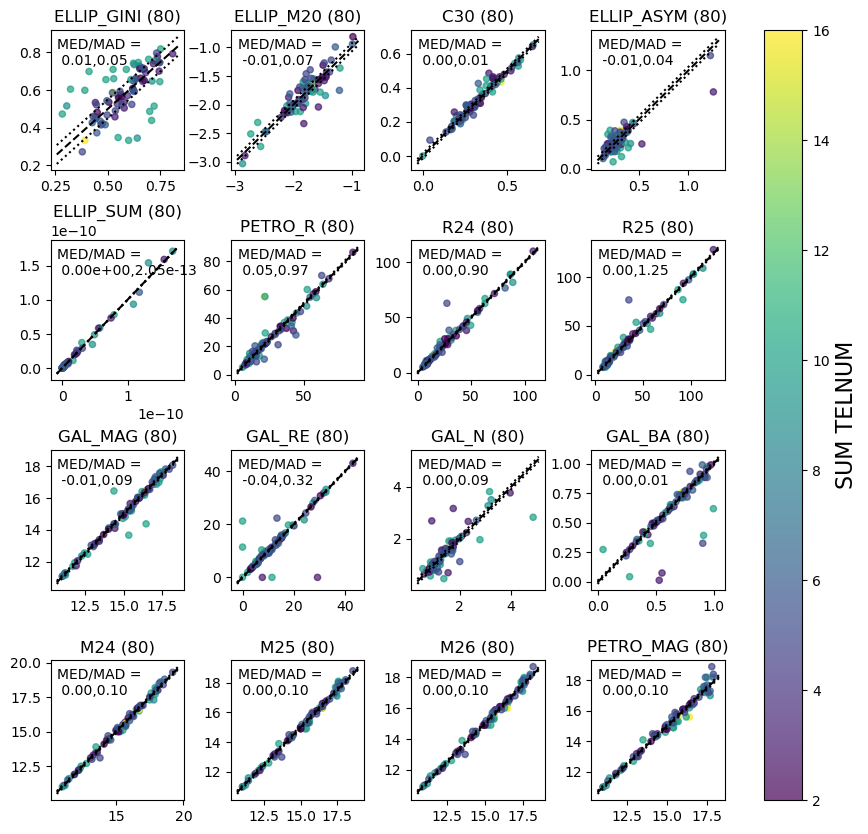

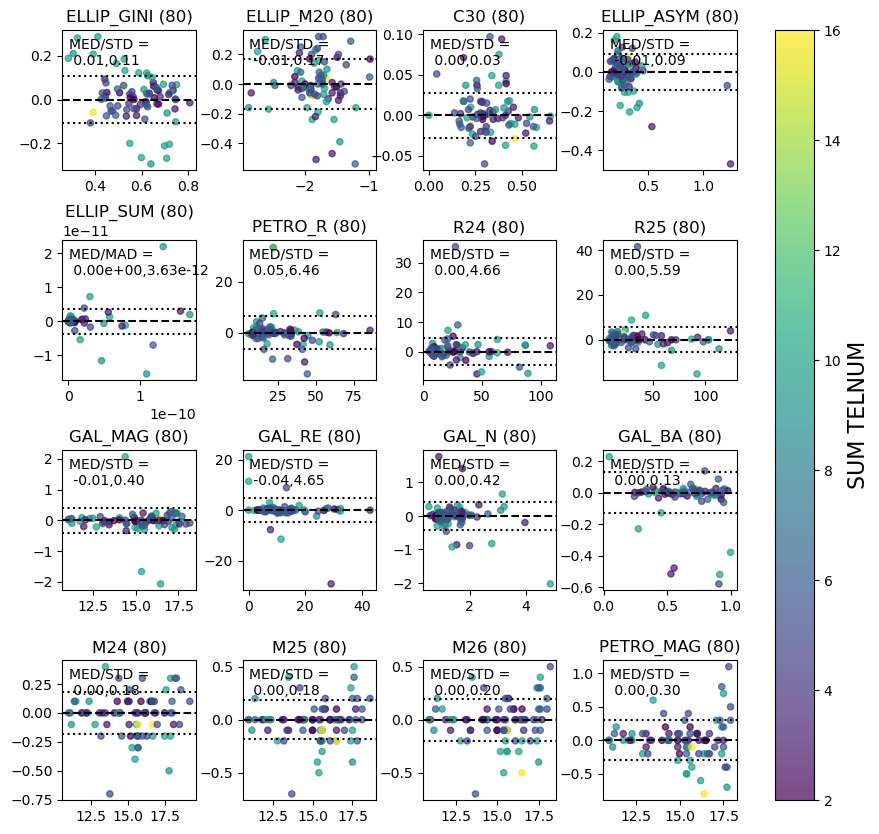

In [222]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams(colorcolumn='TELNUM')
d.plot_rparams_residuals(colorcolumn='TELNUM')
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

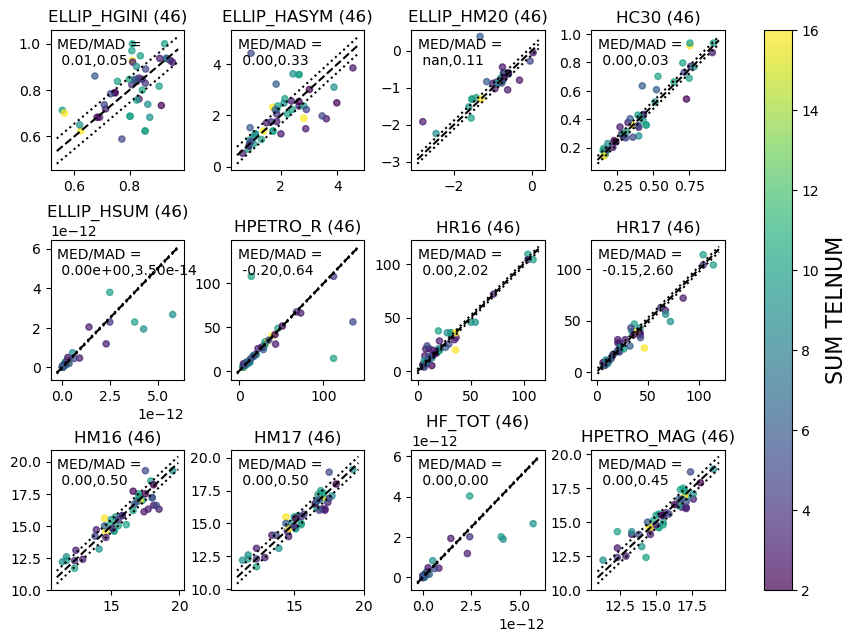

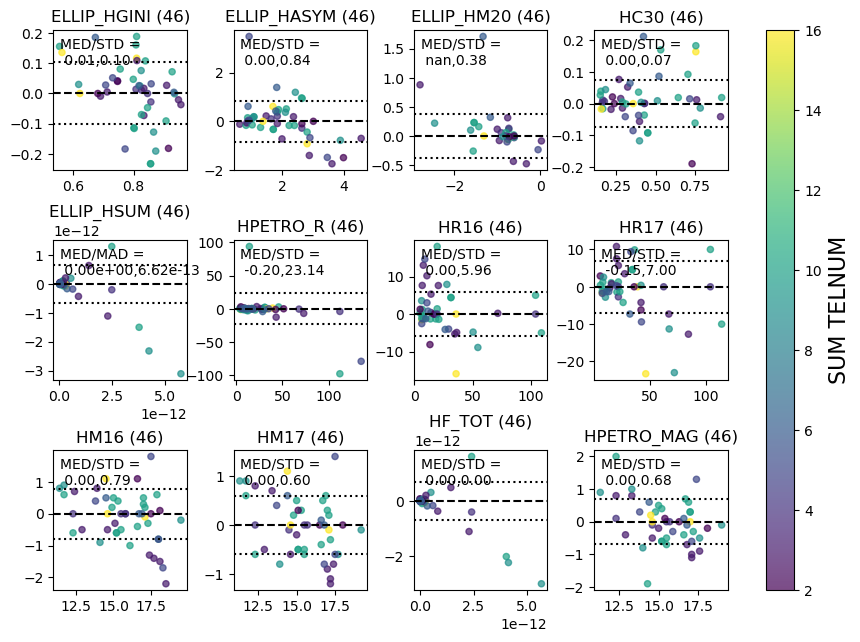

In [221]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams(colorcolumn='TELNUM')
d.plot_hparams_residuals(colorcolumn='TELNUM')
plt.show()

In [277]:
# how many galaxies if we throw out HDI and MOS?

print(f"number of observations from BOK or INT = {np.sum(d.htab['TELNUM'] < 7)} out of {len(d.htab)}")

number of observations from BOK or INT = 690 out of 774


In [20]:
cols = ['F_R24','HF_R24']

tels = ['INT','BOK','HDI','MOS']
telnums = [1,2,4,8]
for c in cols:

    x = d.htab[c]

    ################################
    ## extra selection 
    ################################
    flag = (x[d.dupindex1] > 0) & (x[d.dupindex2] > 0) 

    print(f"###############  {c}   ################## ")
    for i,t in enumerate(tels):
        pass
        


###############  F_R24   ################## 
###############  HF_R24   ################## 


number of galaxies observed in halpha =  868
number after removing galaxies using bad flag from excel spreadsheet =  774
number of duplicate observations = 153


<Figure size 640x480 with 0 Axes>

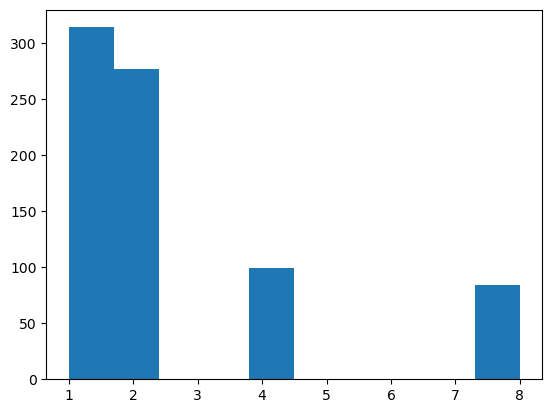

In [9]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
    
plt.figure()
plt.hist(d.htab['TELNUM'])
plt.show()

number of galaxies observed in halpha =  868
number after removing galaxies using bad flag from excel spreadsheet =  774
number of duplicate observations = 153
sum of flag = 13


<Figure size 640x480 with 0 Axes>

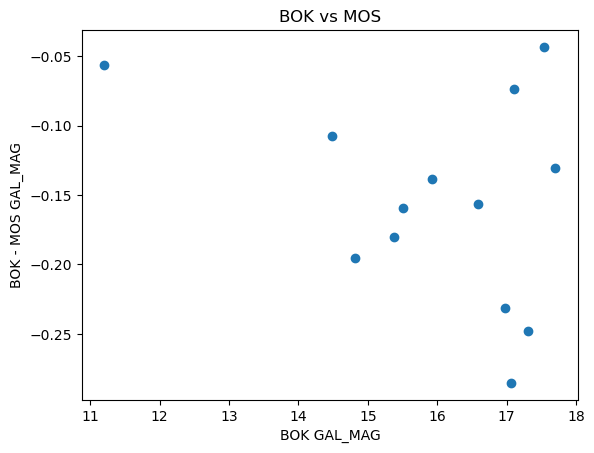

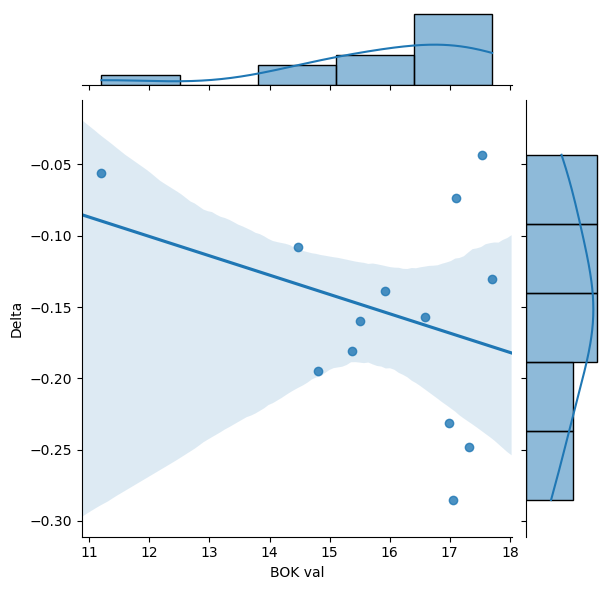

sum of flag = 21


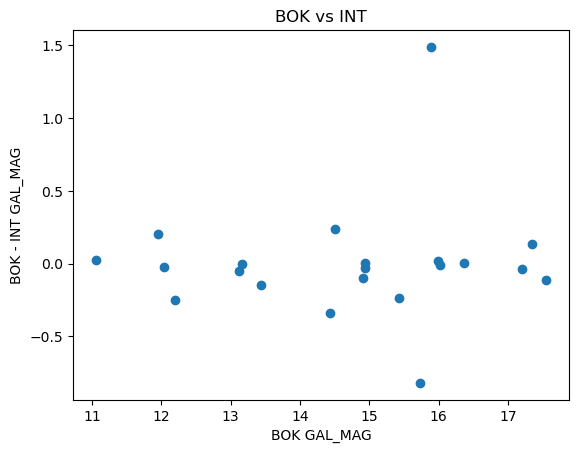

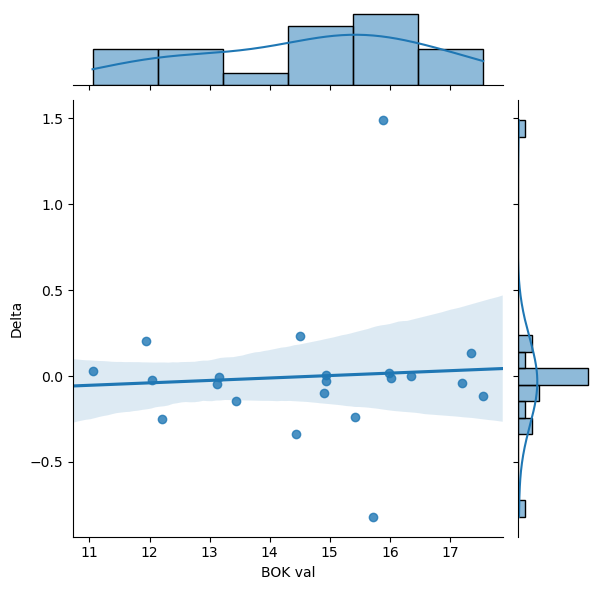

sum of flag = 11


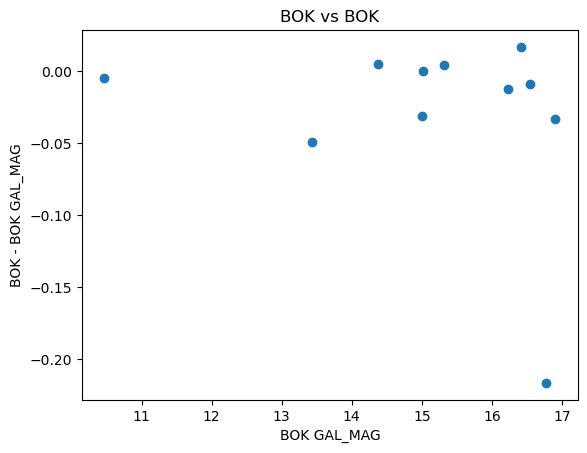

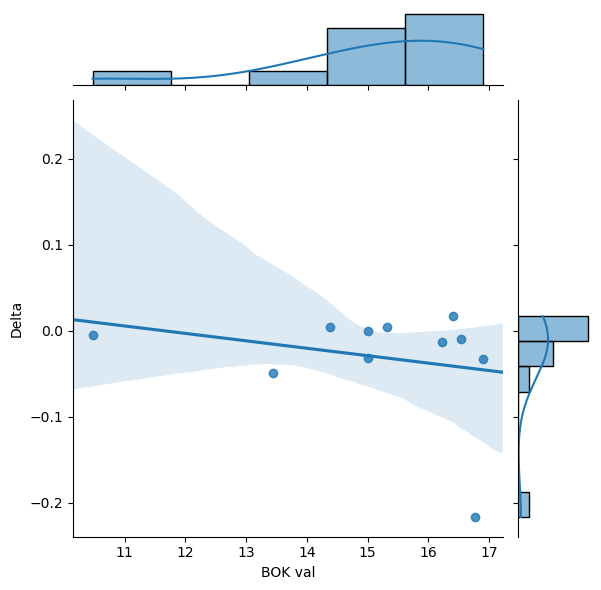

sum of flag = 31


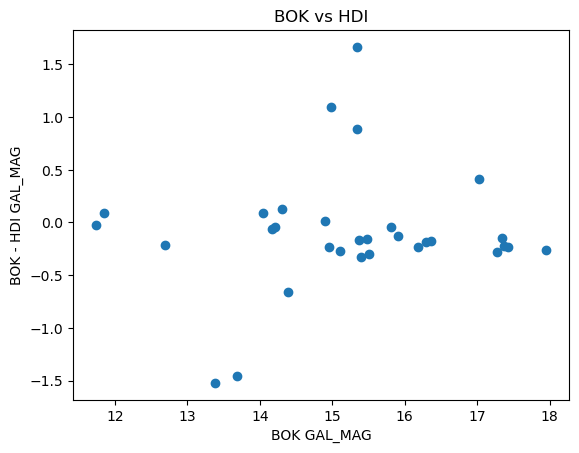

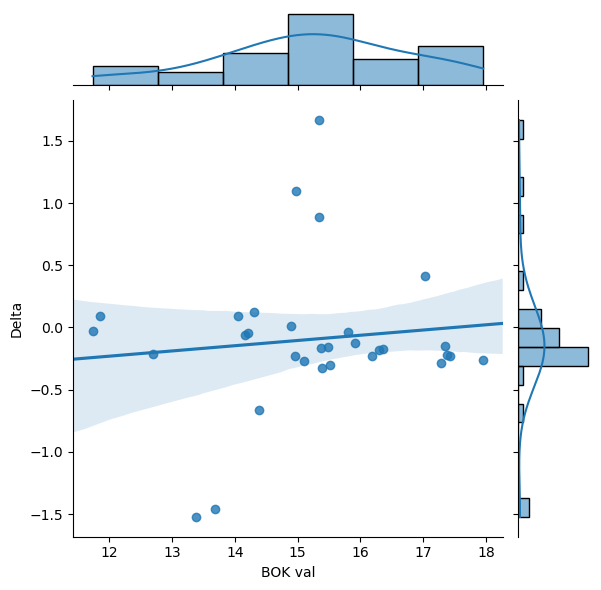

In [49]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
import pandas as pd
import seaborn as sns
alltels = set(d.htab['TEL'])
for t in alltels:
    flag1 = (d.htab['TEL'][d.dupindex1] == 'BOK') & (d.htab['TEL'][d.dupindex2] == t)
    flag2 = (d.htab['TEL'][d.dupindex2] == 'BOK') & (d.htab['TEL'][d.dupindex1] == t)

    colname = 'GAL_MAG'

    delta1 = (d.htab[colname][d.dupindex1] - d.htab[colname][d.dupindex2])
    delta2 = (d.htab[colname][d.dupindex2] - d.htab[colname][d.dupindex1])
    delta = np.zeros(len(d.dupindex1))
    delta[flag1] = delta1[flag1]
    delta[flag2] = delta2[flag2]
    flag = (flag1 | flag2) & (np.abs(delta) < 2)
    print(f"sum of flag = {np.sum(flag)}")
    # make a figure
    plt.figure()
    plt.scatter(d.htab[colname][d.dupindex1][flag], delta[flag])
    plt.title(f"BOK vs {t}")
    plt.xlabel(f"BOK {colname}")
    plt.ylabel(f"BOK - {t} {colname}")
    plt.show()

    newtab = Table([d.htab[colname][d.dupindex1][flag], (delta[flag])], names=['BOK val','Delta'])
    df = newtab.to_pandas()


    g = sns.jointplot(x="BOK val", y="Delta", data=df,
                  kind="reg", truncate=False)
    #                  xlim=(0, 60), ylim=(0, 12),
    #                  color="m", height=7)
    plt.show()

number of galaxies observed in halpha =  868
number after removing galaxies using bad flag from excel spreadsheet =  774
number of duplicate observations = 153
sum of flag = 13
sum of flag = 19
sum of flag = 11
sum of flag = 25


<Figure size 640x480 with 0 Axes>

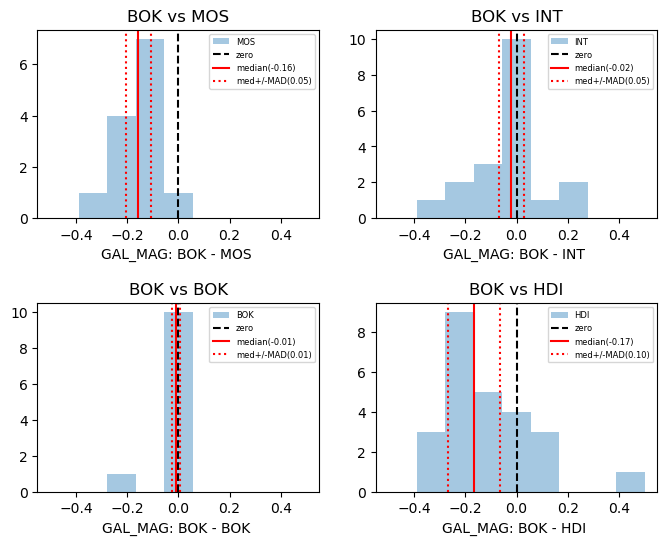

In [81]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
import pandas as pd
import seaborn as sns
from scipy.stats import median_abs_deviation as MAD
alltels = set(d.htab['TEL'])
# make a figure
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=.45)
limit=.5
mybins = np.linspace(-limit,limit,10)
for i,t in enumerate(alltels):
    flag1 = (d.htab['TEL'][d.dupindex1] == 'BOK') & (d.htab['TEL'][d.dupindex2] == t)
    flag2 = (d.htab['TEL'][d.dupindex2] == 'BOK') & (d.htab['TEL'][d.dupindex1] == t)

    colname = 'GAL_MAG'

    delta1 = (d.htab[colname][d.dupindex1] - d.htab[colname][d.dupindex2])
    delta2 = (d.htab[colname][d.dupindex2] - d.htab[colname][d.dupindex1])
    delta = np.zeros(len(d.dupindex1))
    delta[flag1] = delta1[flag1]
    delta[flag2] = delta2[flag2]
    flag = (flag1 | flag2) & (np.abs(delta) < limit)
    print(f"sum of flag = {np.sum(flag)}")
    plt.subplot(2,2,i+1)
    plt.hist(delta[flag],label=t,alpha=.4,bins=mybins)
    plt.axvline(x=0,ls='--',color='k',label='zero')
    med = np.median(delta[flag])
    mad = MAD(delta[flag])
    plt.axvline(x=med,ls='-',color='r',label=f'median({med:.2f})')
    plt.axvline(x=med+mad,ls=':',color='r',label=f'med+/-MAD({mad:.2f})')
    plt.axvline(x=med-mad,ls=':',color='r')#,label=f'med-MAD({mad:.2f})')
    
    plt.legend(fontsize=6)
    plt.title(f"BOK vs {t}")
#plt.xlabel(f"BOK {colname}")
    plt.xlabel(f"{colname}: BOK - {t} ")
plt.show()

    #newtab = Table([d.htab[colname][d.dupindex1][flag], (delta[flag])], names=['BOK val','Delta'])
    #df = newtab.to_pandas()


    #g = sns.jointplot(x="BOK val", y="Delta", data=df,
    #              kind="reg", truncate=False)
    #                  xlim=(0, 60), ylim=(0, 12),
    #                  color="m", height=7)
    #plt.show()